    1.201805032 - Ardıl Silan Aydın
    2.201805016 - Beril Kartal
    3.201805060 - Elif Yılmaz
    4.201805017 - Neslihan Özdil
    5.201805045 - Orhan Gazi Barak
    
    In this dataset there are two csv files. In sh_car_price.csv is raw csv file for acquisited data, data.csv contains preprocessed data from sh_car_price.csv. So, we worked on dataset.csv file.
    
    Firstly, we sorted whole dataset by Price in ascending order.
    
    After that, we extracted some statiscal features from data with sliding window method. We preferred window size is 10. We used Price, Horsepower, Km, Top Speed and Tank columns. Our statiscal features are mean, median, standard deviation, variance, skewness, kurtosis, quantile(0.25), quantile(0.75) and mode.
    
    Mean: The mean is a measure obtained by dividing the sum of the numerical values in a data set by the number of elements of the data set.
    Median: Is a measure that expresses the middle value when the values in a data set are sorted in ascending order. 
    Standard Deviation: Is a statistical measure of how much the values in a data set differ from the mean value.
    Variance: Is a statistical measure of how widely the values in a data set are spread.
    Skewness: Is a statistical measure that quantifies whether a data distribution is symmetric and, if not, in which direction and how much deviation there is. Negative skewness indicates that the data distribution is skewed to the left, while positive skewness indicates skewness to the right.
    Kurtosis:Kurtosis is a statistical term that measures how "dense" the tails of a probability distribution, especially a random variable, are. More specifically, kurtosis describes the shape and size of the tails of the distribution relative to its mean.
        * Normal Distribution: The kurtosis is 0 for a normal distribution. This indicates how spread out the tails of the normal distribution are relative to the mean.
        * Positive Kurtosis: A positive kurtosis describes distributions that have a higher and pointed peak than the normal distribution. The tails can be thinner and longer.
        * Negative kurtosis: A negative kurtosis describes a distribution that is flatter and wider than the normal distribution. The peak may be more spread out and the tails shorter.
    Quantile: Is the value that divides a data set into a certain percentile.
    Mode: Is the most frequently repeated value in a dataset.
    
    Finally, we standardized which contains not categorical data columns.
    
    We kept the data for training in a different csv file to avoid confusion.We kept the data for training in a different csv file to avoid confusion.

In [3]:
import pandas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataset = pandas.read_csv('data.csv')
#dataset = dataset.drop(columns=['Model','Brand'])
datasetNumericNonCategoricalColumns = ['Price', 'Horsepower', 'Km', 'Top Speed', 'Tank']

dataset = dataset.sort_values(by='Price')

def sliding_window(input_data, window_size):
    data = []
    for i in range(len(input_data)):
        data.append(input_data[i:i+window_size])
    return data

window_size = 10

#A loop for Mean Feature
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_means = [window.mean() for window in windowed_data]
    windowed_means = pandas.DataFrame({f'Mean_{column}_{window_size}': windowed_means})
    dataset = pandas.concat([dataset, windowed_means], axis=1)
    
#A loop for Standard Deviation feature
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_stds = [window.std() for window in windowed_data]
    windowed_stds = pandas.DataFrame({f'Std_{column}_{window_size}': windowed_stds})
    dataset = pandas.concat([dataset, windowed_stds], axis=1)

#A loop for Variance Feature
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_vars = [window.var() for window in windowed_data]
    windowed_vars = pandas.DataFrame({f'Var_{column}_{window_size}': windowed_vars})
    dataset = pandas.concat([dataset, windowed_vars], axis=1)

#A loop for Mode Feature
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_mode = [window.mode().values[0] for window in windowed_data]
    windowed_mode = pandas.DataFrame({f'Mode_{column}_{window_size}': windowed_mode})
    dataset = pandas.concat([dataset, windowed_mode], axis=1)

#A loop for Median Feature
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_median = [window.median() for window in windowed_data]
    windowed_median = pandas.DataFrame({f'Median_{column}_{window_size}': windowed_median})
    dataset = pandas.concat([dataset, windowed_median], axis=1)

#A loop for Quantile Features
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_quant_1 = [window.quantile(0.25) for window in windowed_data]
    windowed_quant_1 = pandas.DataFrame({f'Quantile_(0.25)_{column}_{window_size}': windowed_quant_1})
    dataset = pandas.concat([dataset, windowed_quant_1], axis=1)

for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_quant_2 = [window.quantile(0.75) for window in windowed_data]
    windowed_quant_2 = pandas.DataFrame({f'Quantile_(0.75)_{column}_{window_size}': windowed_quant_2})
    dataset = pandas.concat([dataset, windowed_quant_2], axis=1)

#A loop for Skewness Feature
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_skew = [window.skew() for window in windowed_data]
    windowed_skew = pandas.DataFrame({f'Skewness_{column}_{window_size}': windowed_skew})
    dataset = pandas.concat([dataset, windowed_skew], axis=1)

#A loop for Kurtosis Feature
for column in datasetNumericNonCategoricalColumns:
    windowed_data = sliding_window(dataset[column], window_size)
    windowed_kurt = [window.kurt() for window in windowed_data]
    windowed_kurt = pandas.DataFrame({f'Kurtosis_{column}_{window_size}': windowed_kurt})
    dataset = pandas.concat([dataset, windowed_kurt], axis=1)

#Create dataset for training
dataset.to_csv('data_new.csv', index=False)

    Dataset Standardize

In [5]:
datasetStandardized = pandas.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
datasetStandardized

Model     Brand      Price  Gear_manuel  Gear_multitronic  \
0    -0.740914  0.470921  -0.813581     2.171552         -0.154172   
1    -0.158030 -1.171623  -0.741772    -0.460500         -0.154172   
2     0.370208 -1.258072  -0.741567     2.171552         -0.154172   
3     0.370208 -1.258072  -0.741567     2.171552         -0.154172   
4     0.315562  0.384472  -0.729306     2.171552         -0.154172   
...        ...       ...        ...          ...               ...   
2407 -1.505948 -1.863220   8.699532    -0.460500         -0.154172   
2408  0.588789  0.298022   9.516943    -0.460500         -0.154172   
2409 -0.977710  0.298022  10.130002    -0.460500         -0.154172   
2410 -0.121600 -0.134226  12.786588    -0.460500         -0.154172   
2411 -1.669884  0.298022  17.486702    -0.460500         -0.154172   

      Gear_otomatik  Fuel_benzin  Fuel_dizel  Fuel_elektrik  \
0         -0.648456    -1.233035    1.281343      -0.100251   
1          1.542126     0.811007   -0.780431      -0.100251   
2         -0.648456    -1.233035   -0.780431      -0.100251   
3         -0.648456    -1.233035    1.281343      -0.100251   
4         -0.648456    -1.233035    1.281343      -0.100251   
...             ...          ...         ...            ...   
2407      -0.648456    -1.233035    1.281343      -0.100251   
2408      -0.648456     0.811007   -0.780431      -0.100251   
2409      -0.648456     0.811007   -0.780431      -0.100251   
2410      -0.648456     0.811007   -0.780431      -0.100251   
2411      -0.648456     0.811007   -0.780431      -0.100251   

      Engine Displacement  ...  Skewness_Price_10  Skewness_Horsepower_10  \
0               -0.165458  ...           0.612690               -0.173287   
1                0.335589  ...           0.296384                0.975330   
2               -0.666504  ...           0.737502                0.474679   
3                0.335589  ...           0.711745                1.256020   
4                0.085066  ...           0.088574                0.310461   
...                   ...  ...                ...                     ...   
2407             3.842917  ...           0.083207                0.488121   
2408             3.592394  ...          -0.848801               -0.946843   
2409             3.842917  ...          -0.928968               -0.689509   
2410             6.348151  ...          -0.780359                0.811713   
2411             3.842917  ...           0.035715               -0.251978   

      Skewness_Km_10  Skewness_Top Speed_10  Skewness_Tank_10  \
0          -0.676810               0.865968         -0.356975   
1          -1.056444               1.356371          0.794351   
2           0.261419               0.088522         -0.741432   
3          -1.130580               0.338212          1.015890   
4          -1.241734               0.298383         -1.159436   
...              ...                    ...               ...   
2407       -0.614030              -0.481669          0.030648   
2408        0.957004              -1.431113         -0.922452   
2409        0.234029              -1.460535          1.090221   
2410       -0.005692              -1.600083         -0.128019   
2411       -0.742489              -1.099378          0.265119   

      Kurtosis_Price_10  Kurtosis_Horsepower_10  Kurtosis_Km_10  \
0             -0.391419               -0.518053       -0.744306   
1             -0.604937                0.751741       -0.977598   
2              0.236133               -0.730115        0.014409   
3             -0.495748                1.267895       -1.292262   
4             -0.679536                0.618507       -0.676563   
...                 ...                     ...             ...   
2407          -0.021563                0.118731       -0.030178   
2408           0.538624               -0.763796        0.833285   
2409          -0.320810               -1.037705       -0.361692   
2410          -0.269825            

    Normalized Absolute Cross-Correlation Map

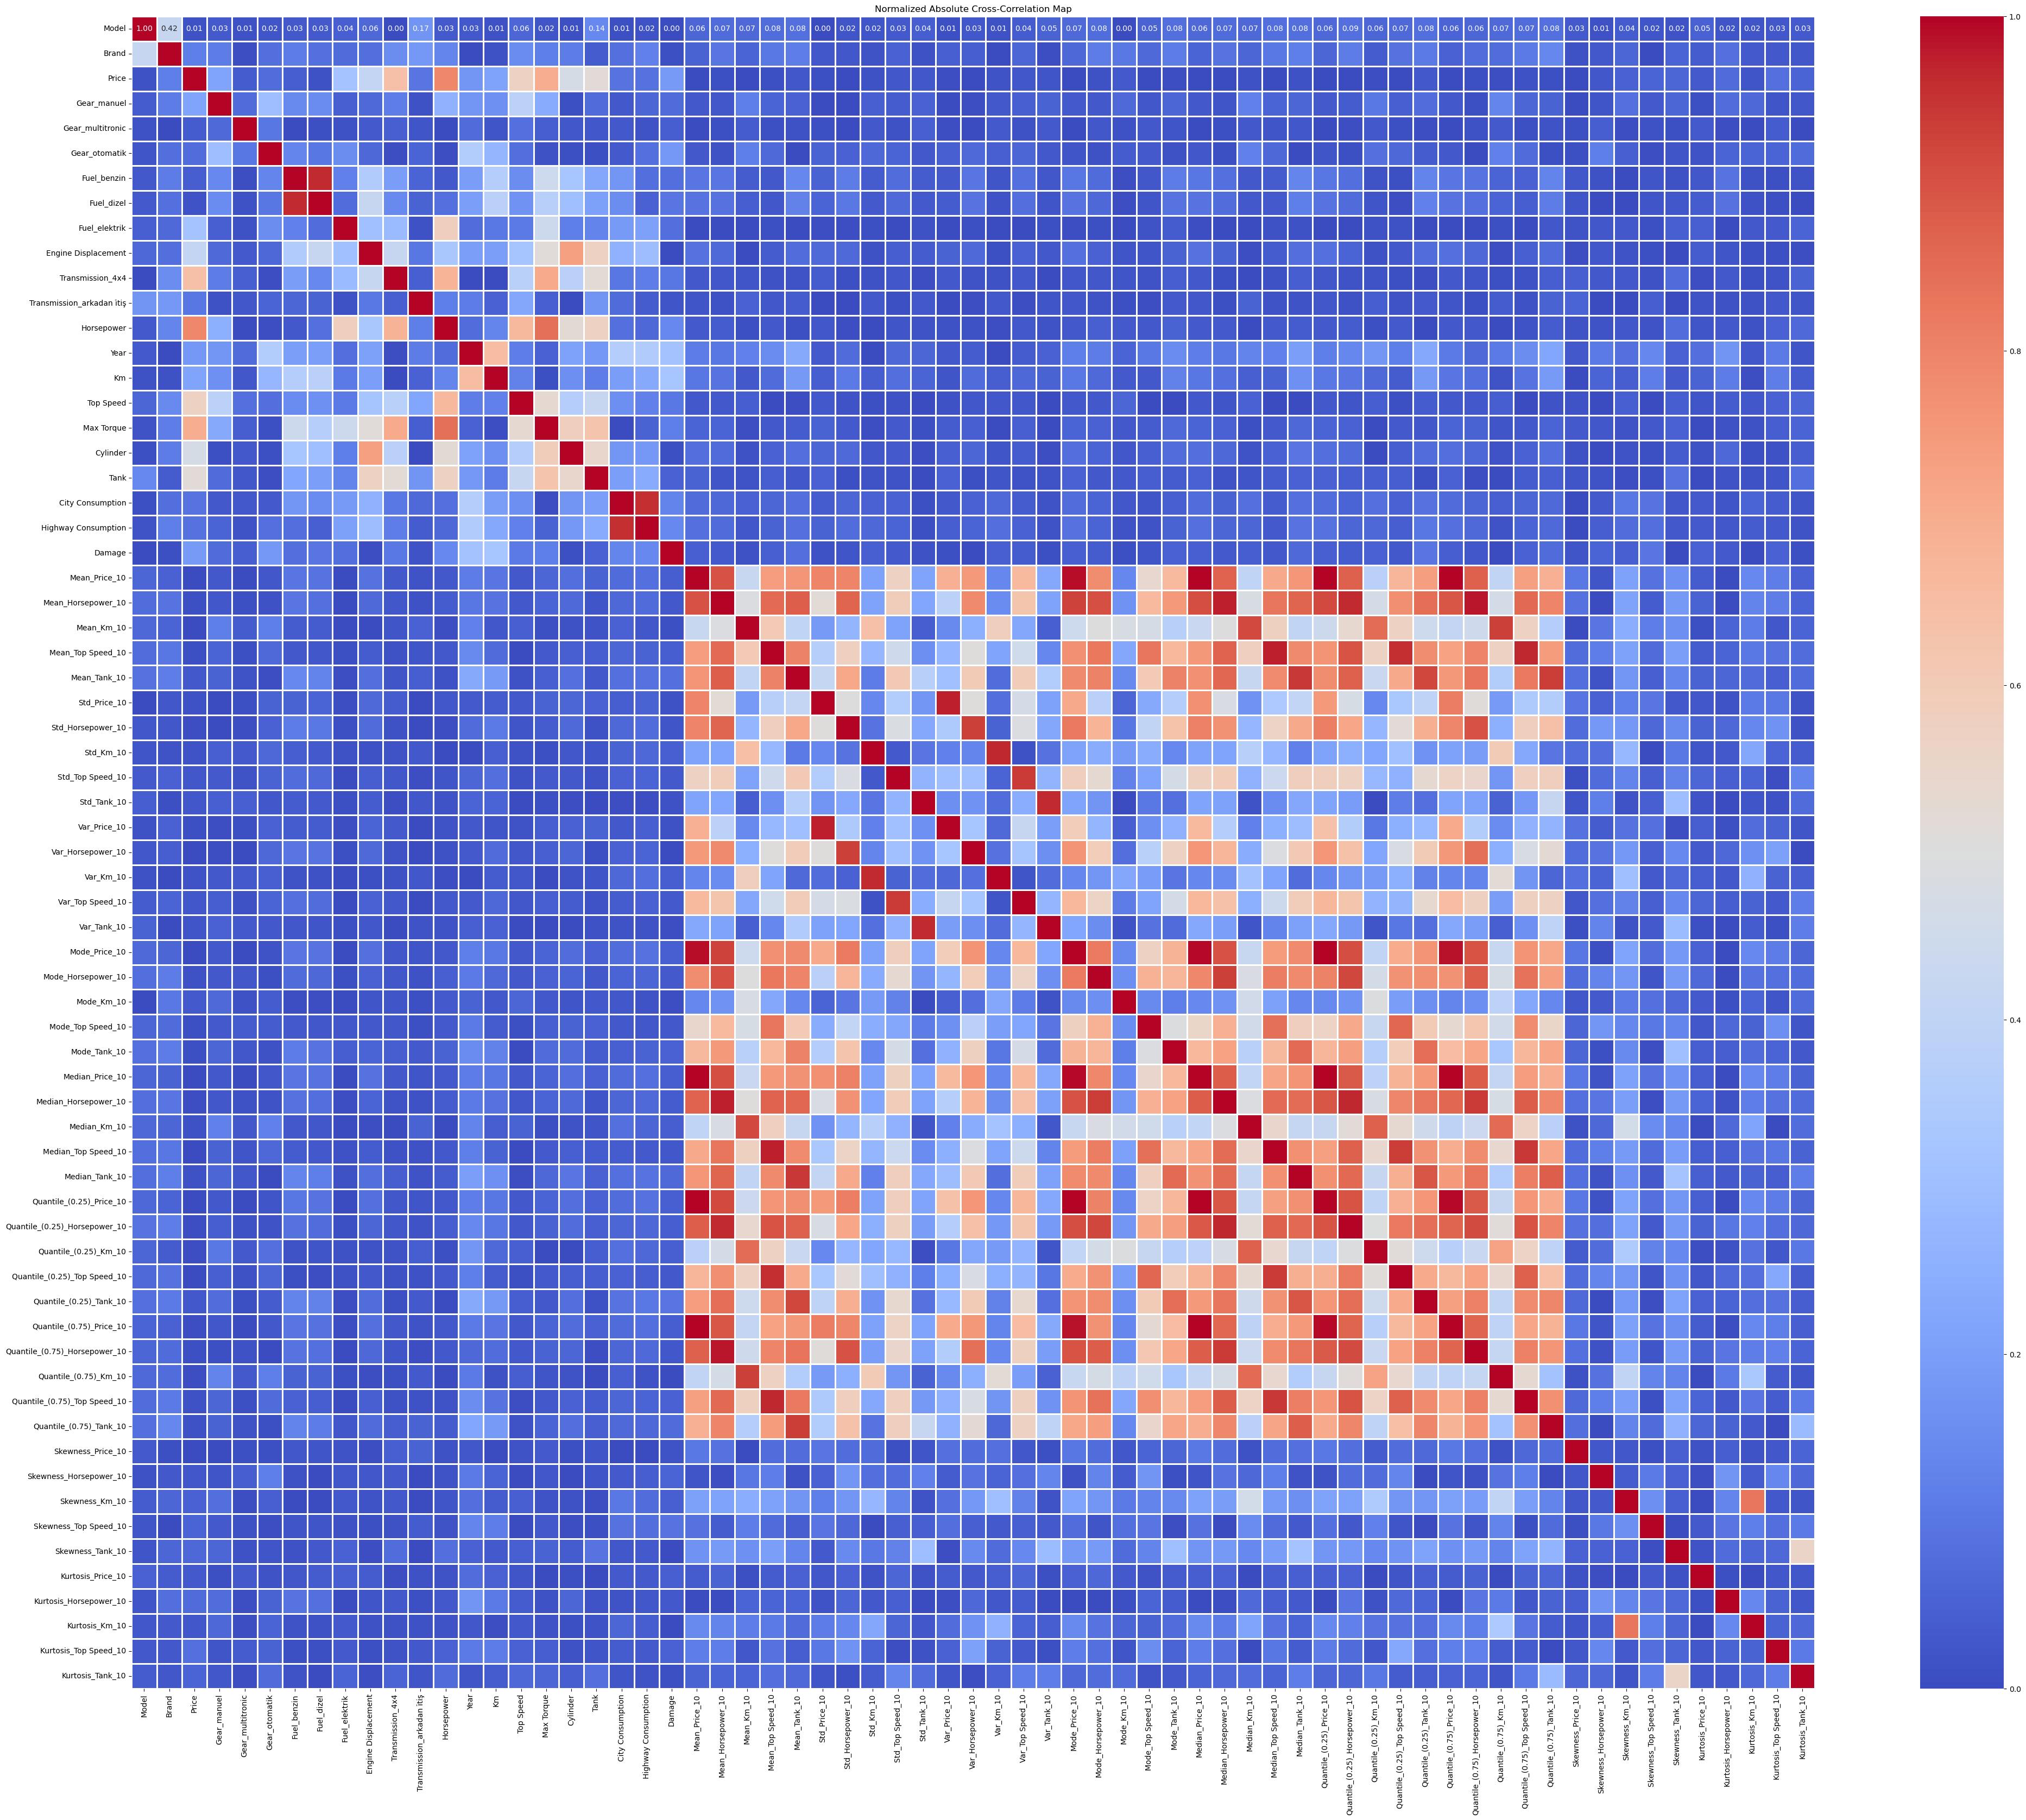

In [7]:
import seaborn,numpy
import matplotlib.pyplot as plot

#Calculate Correlation Matrix for every columns
correlation_matrix = dataset.corr()

#Calculate absolute normalized values
absolute_of_correlation = numpy.abs(correlation_matrix)
normalized_of_absolute_correlation = (absolute_of_correlation - absolute_of_correlation.min()) / (absolute_of_correlation.max() - absolute_of_correlation.min())

#Draw plot
plot.figure(figsize=(50,40))
seaborn.heatmap(normalized_of_absolute_correlation, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.2f', annot_kws={'size':10}, linewidth=.9)
plot.title('Normalized Absolute Cross-Correlation Map')
plot.show()

    Scatter Plot

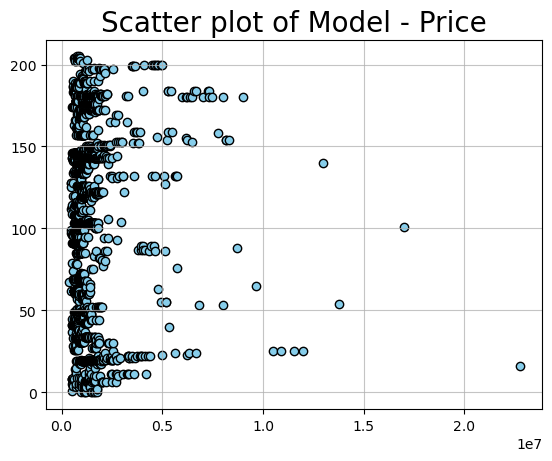

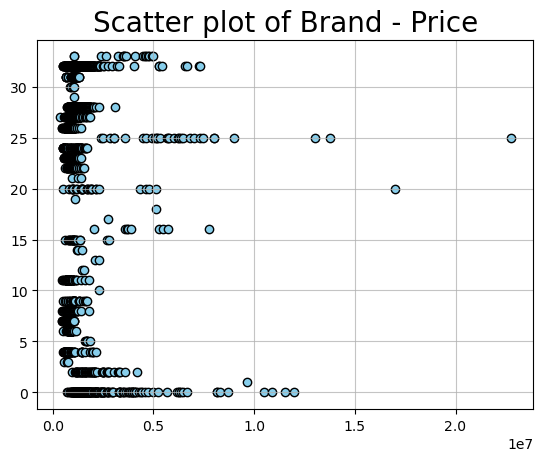

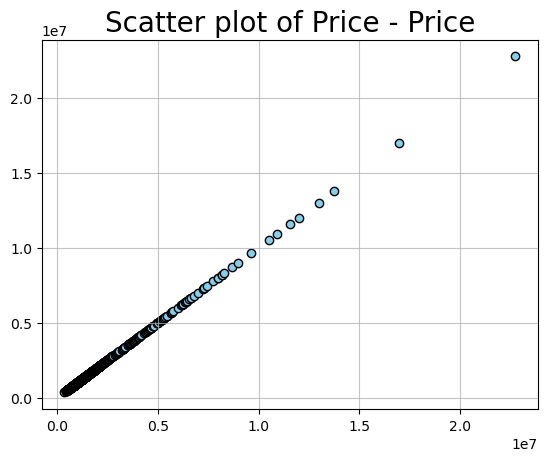

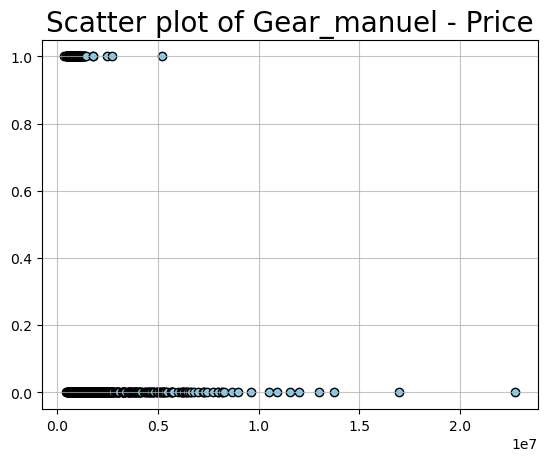

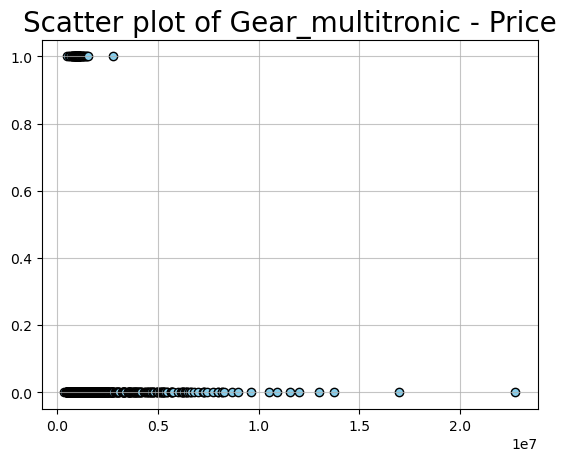

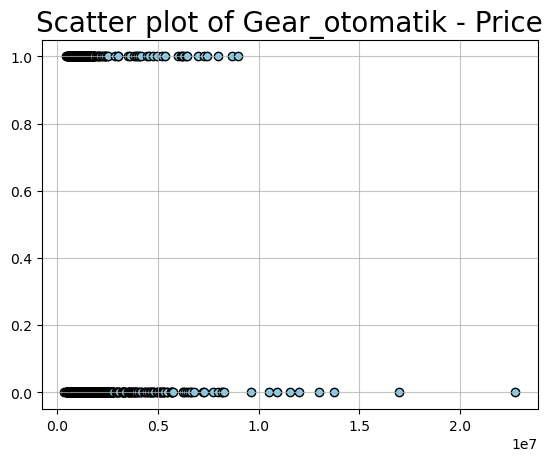

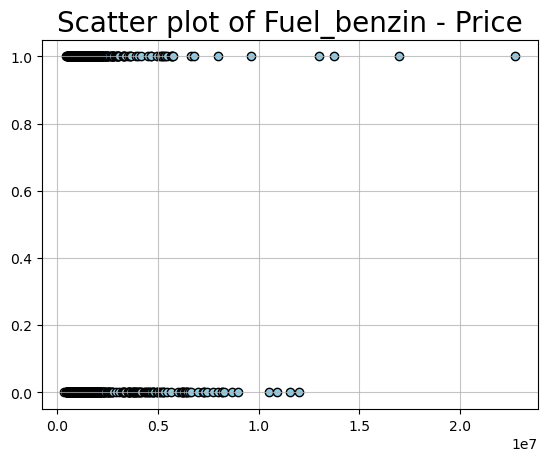

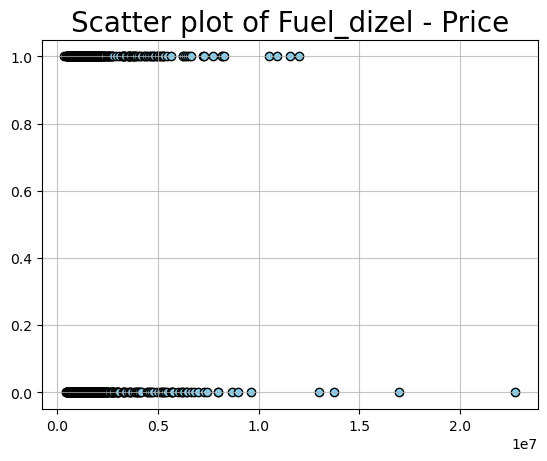

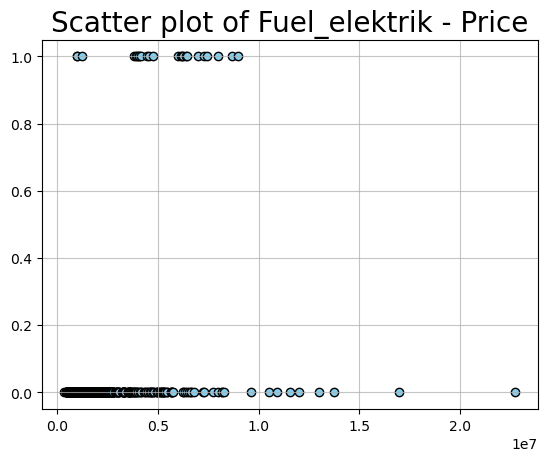

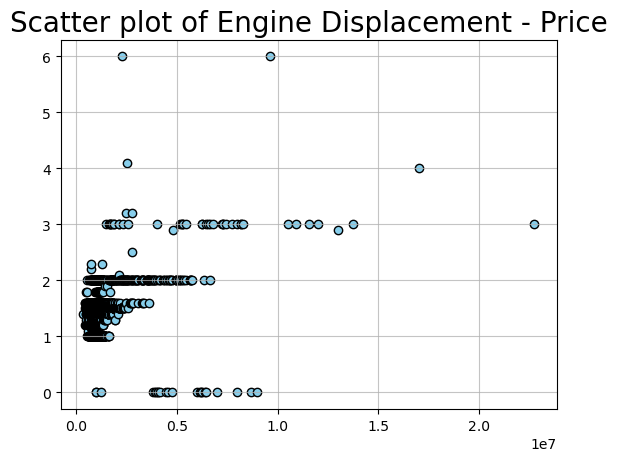

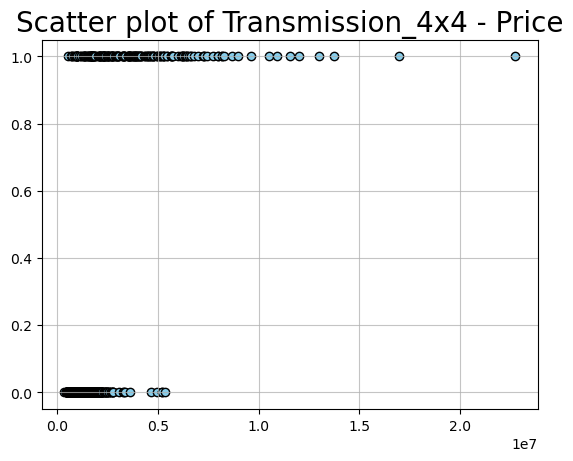

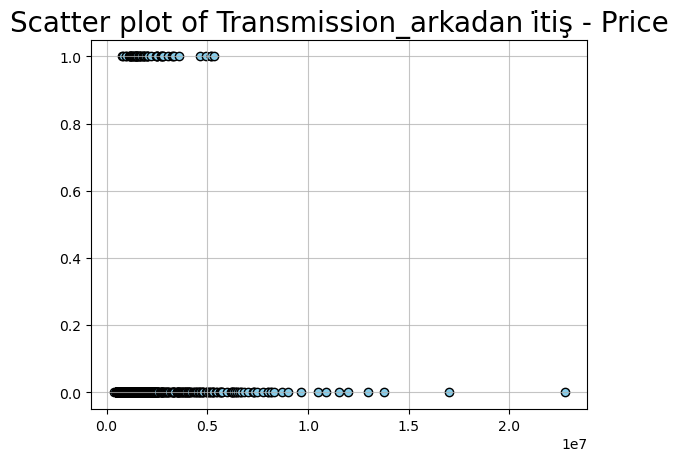

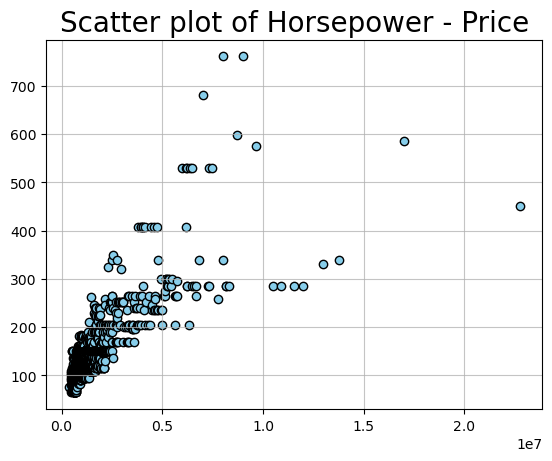

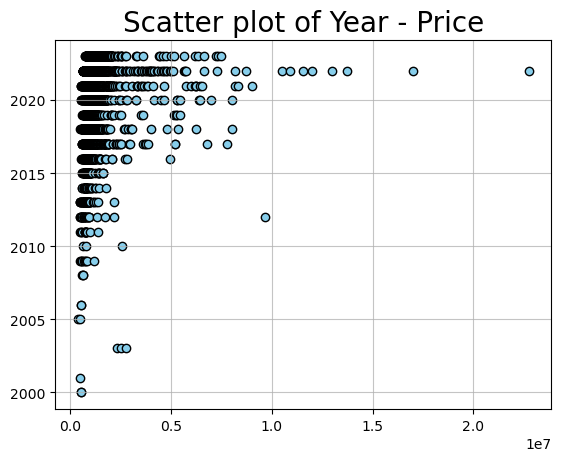

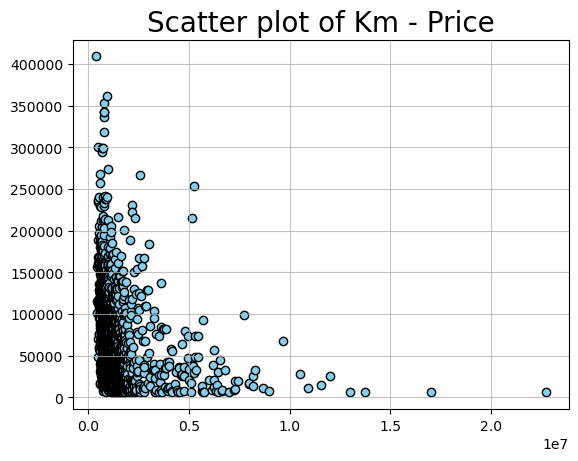

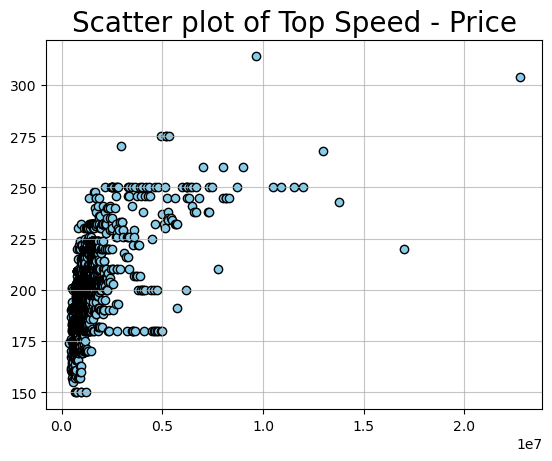

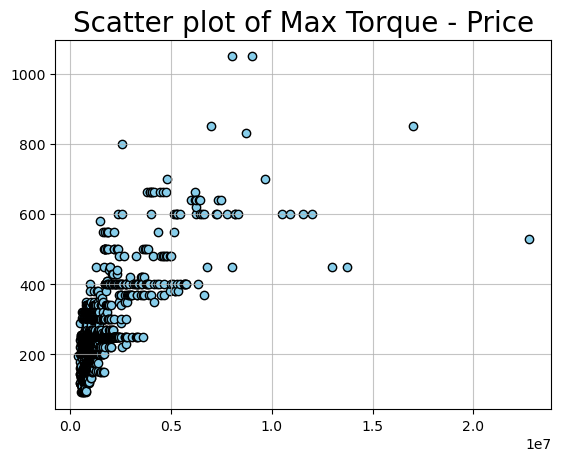

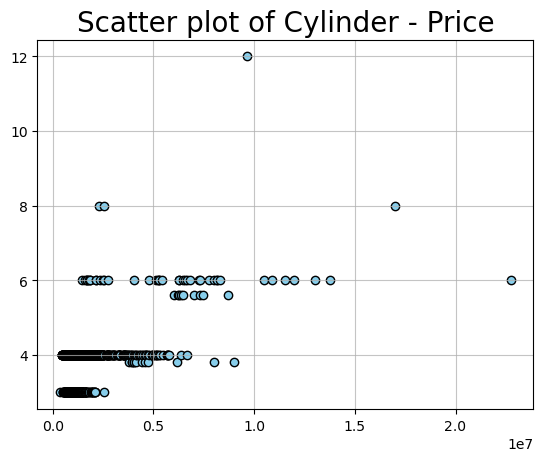

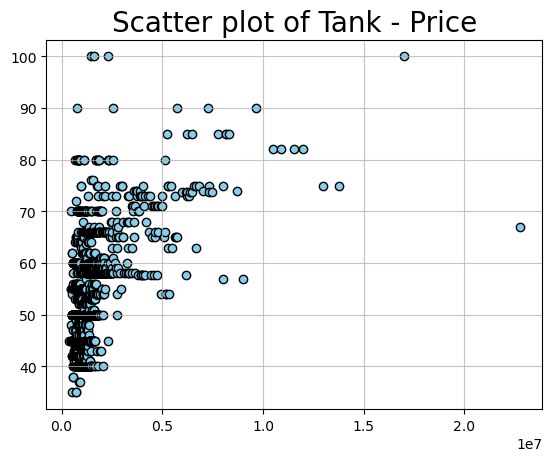

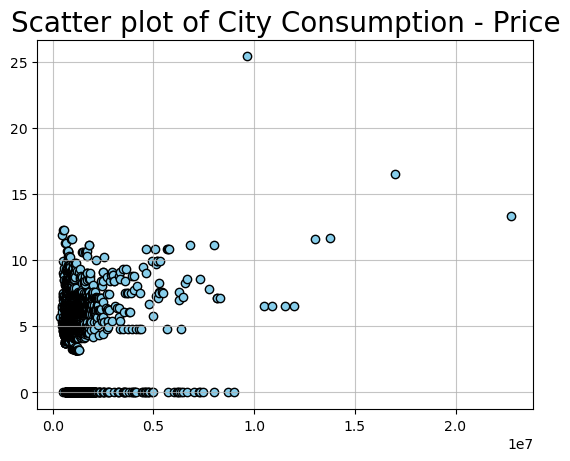

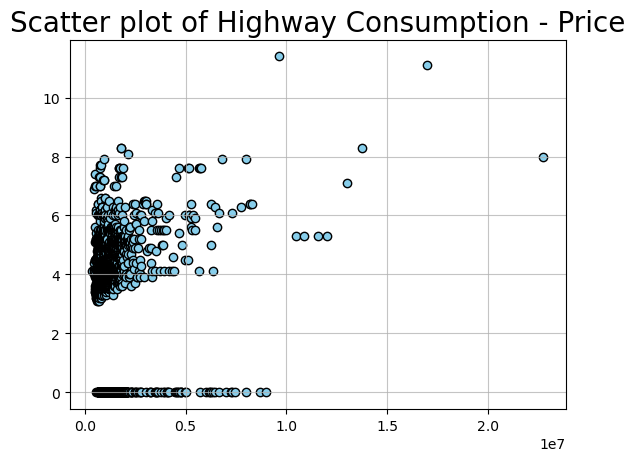

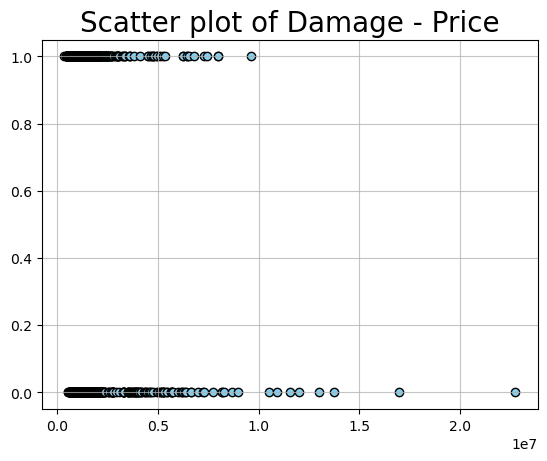

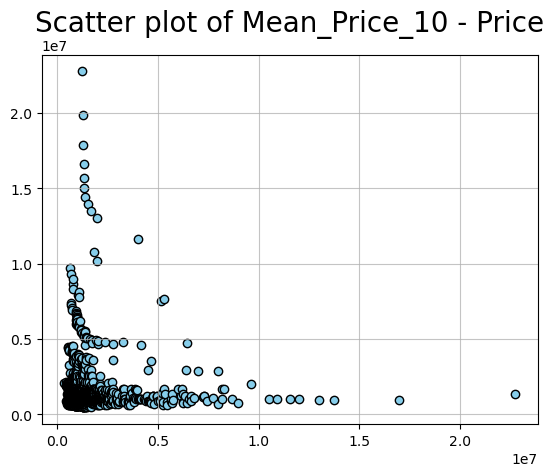

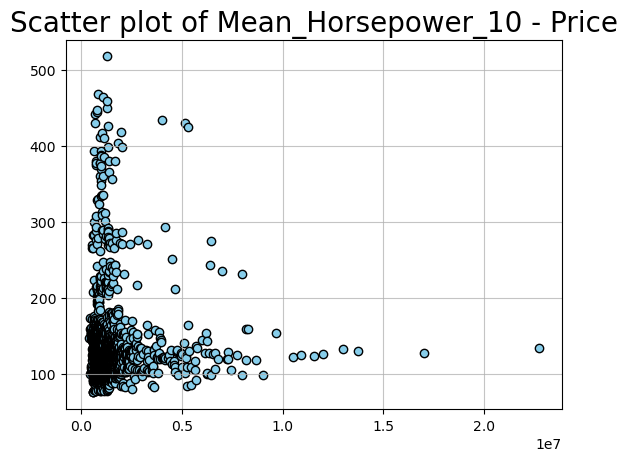

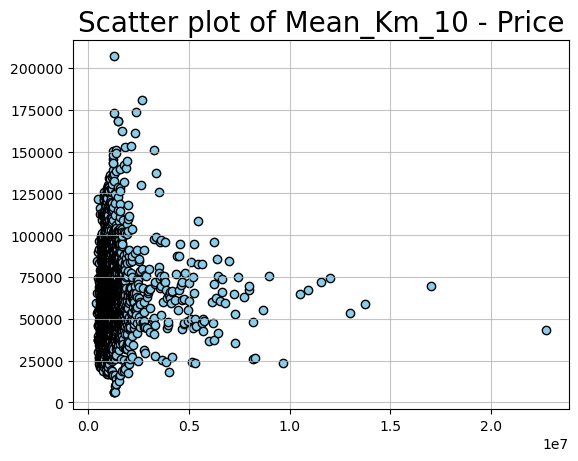

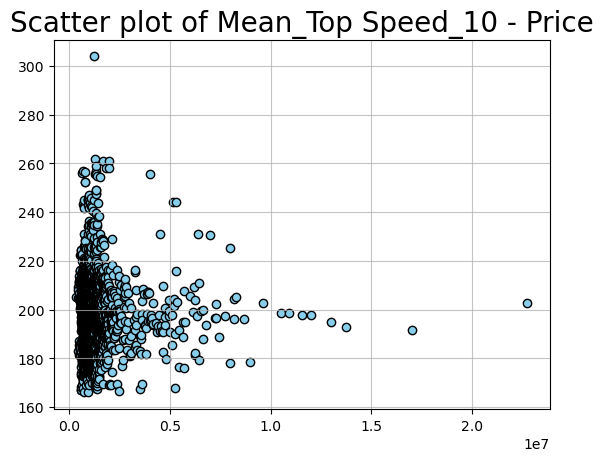

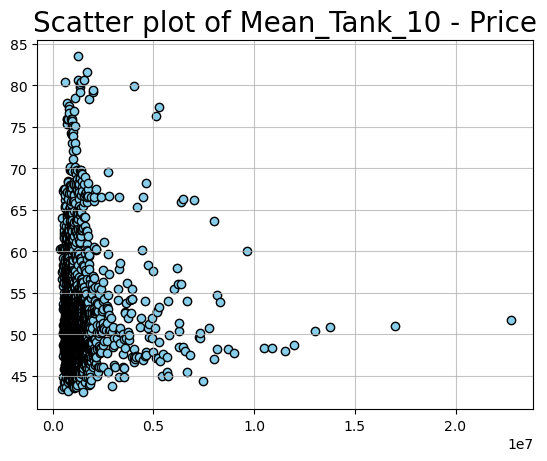

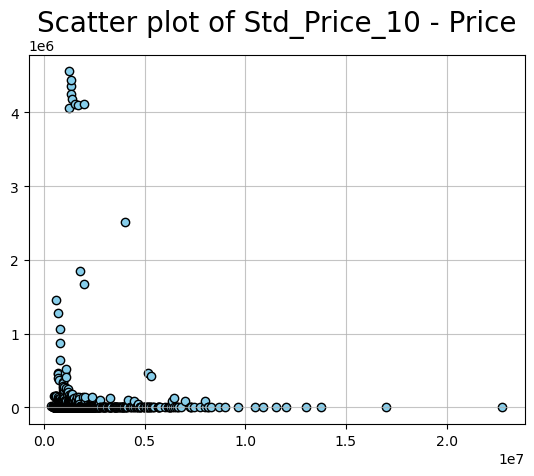

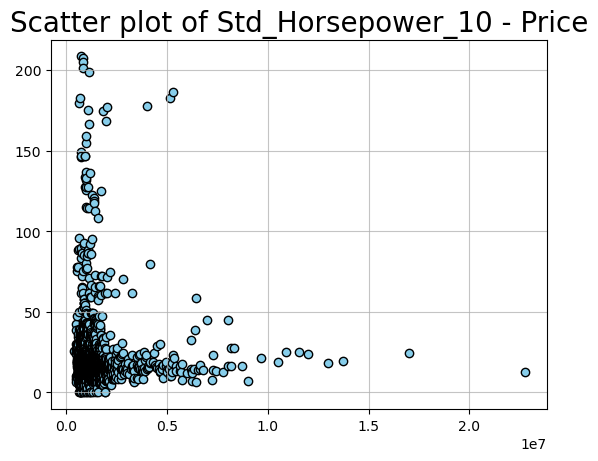

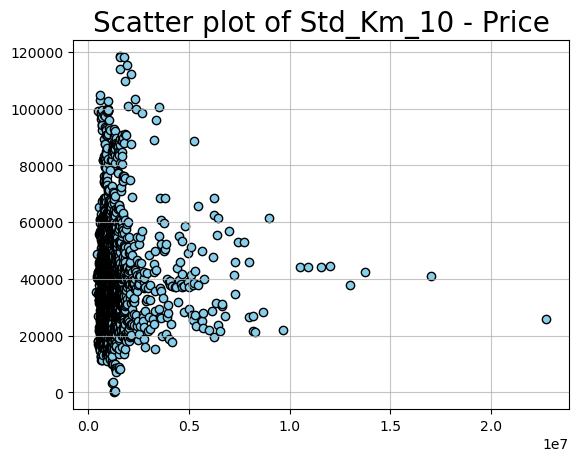

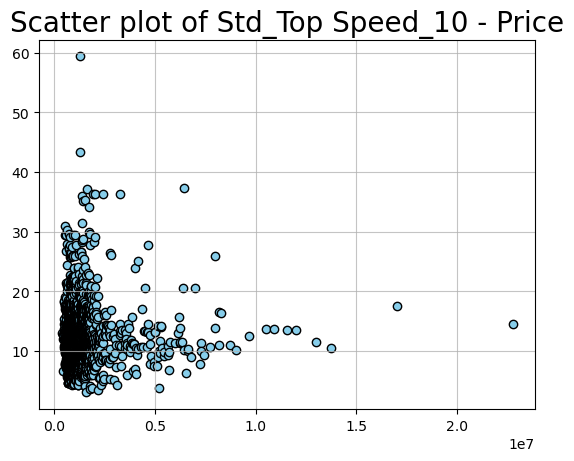

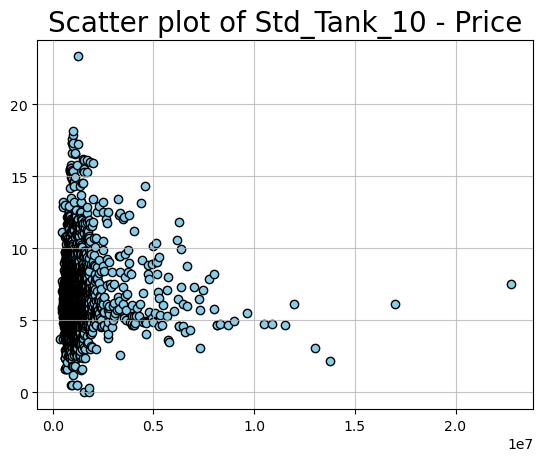

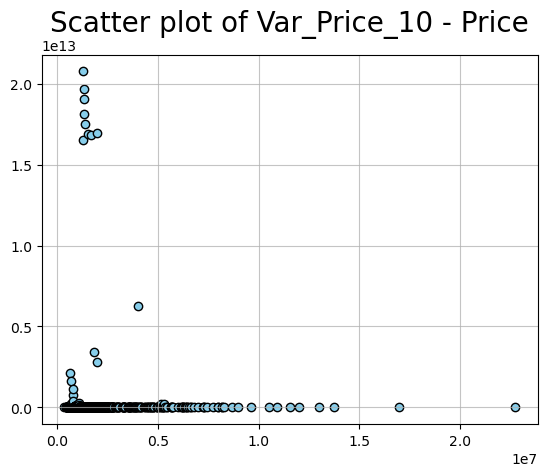

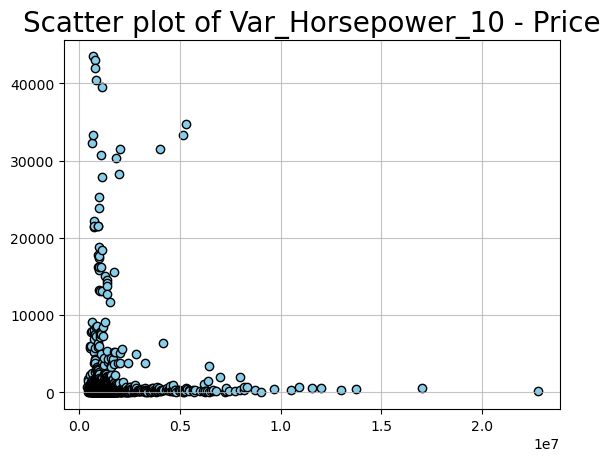

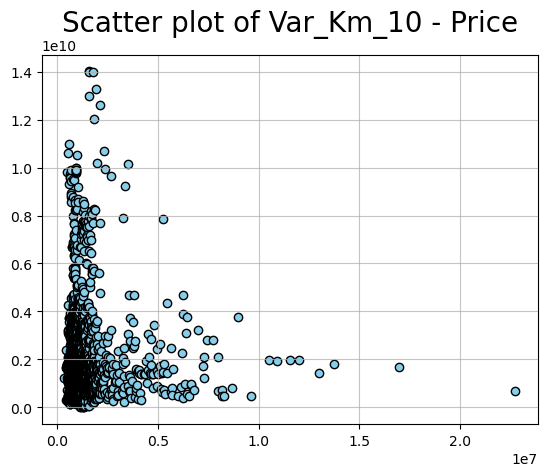

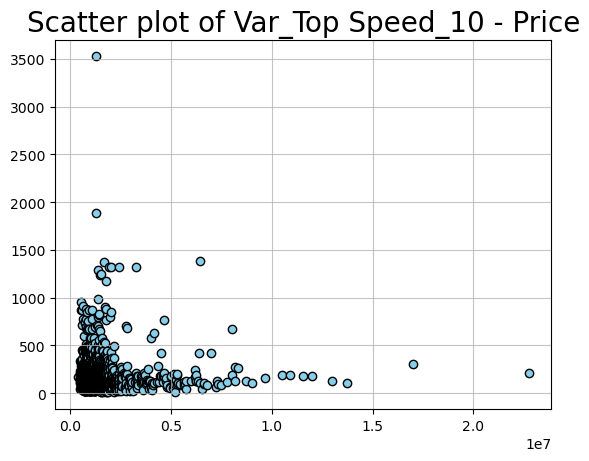

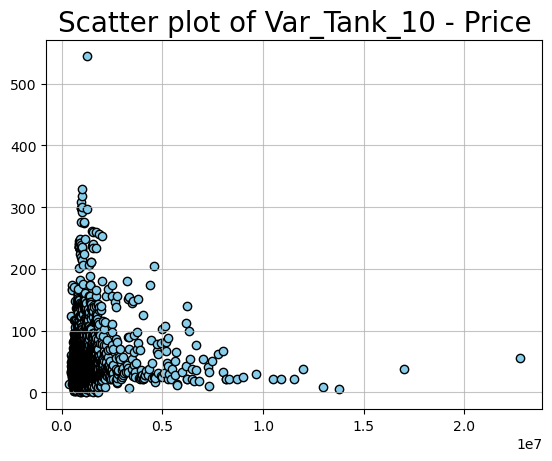

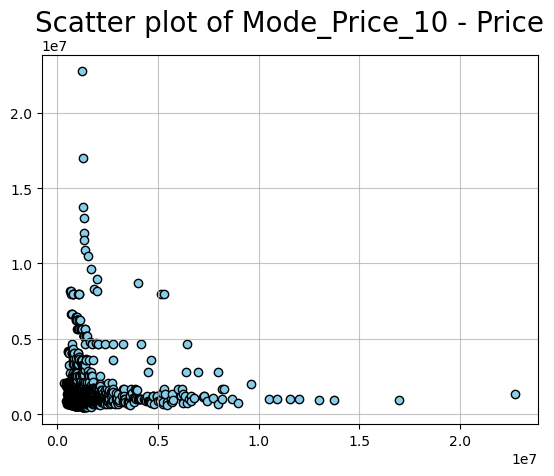

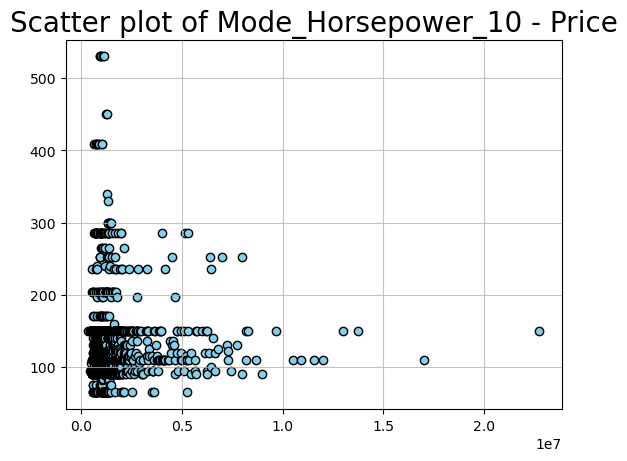

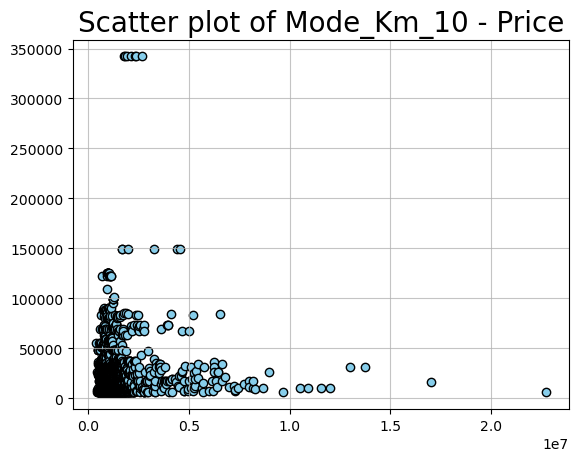

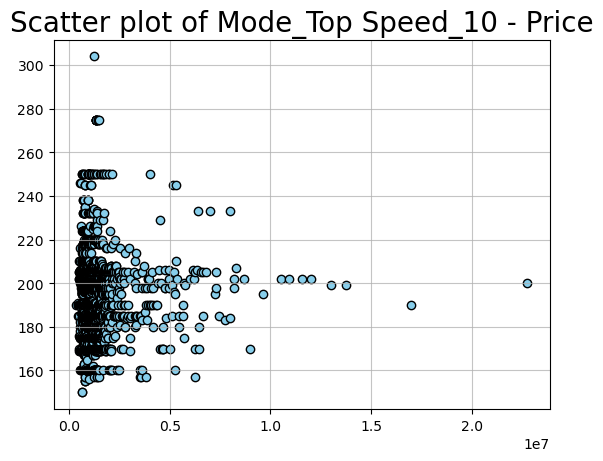

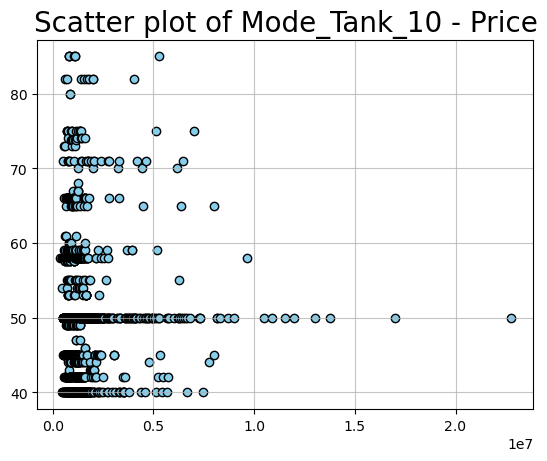

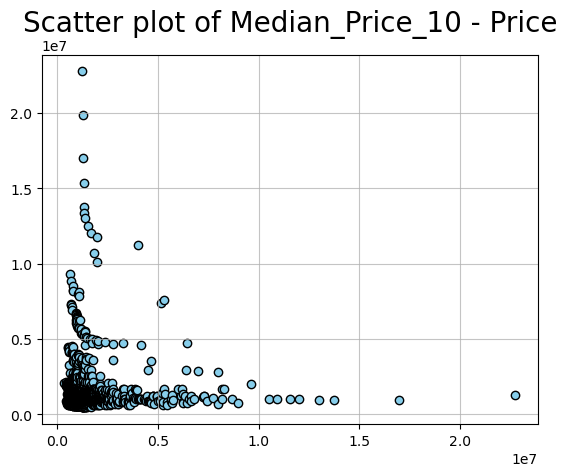

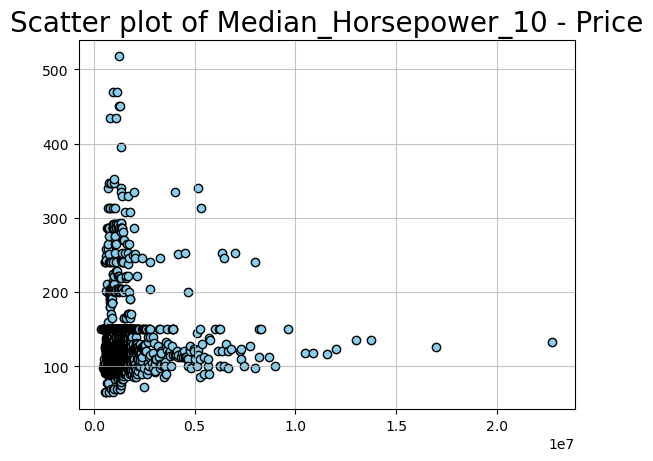

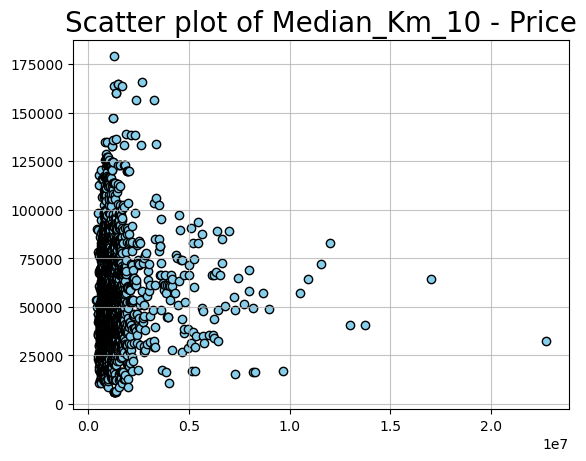

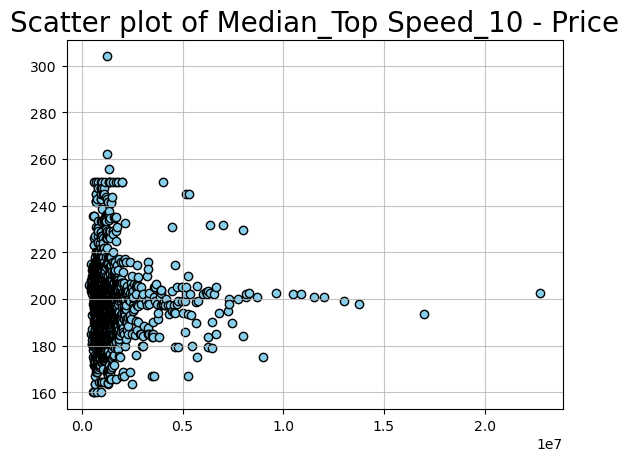

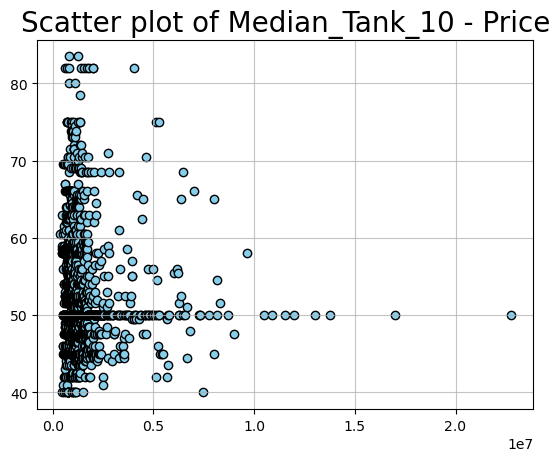

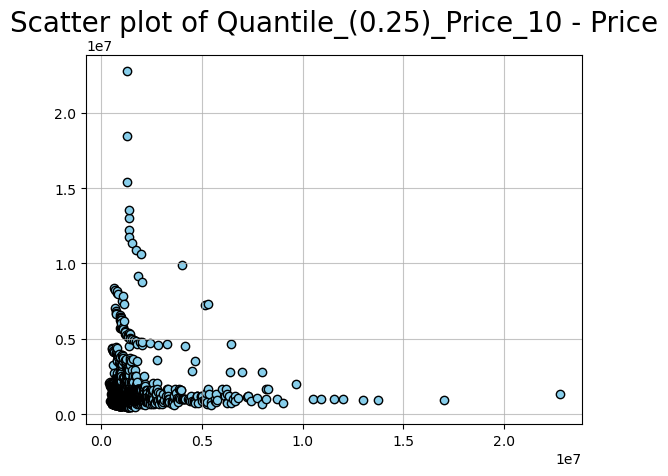

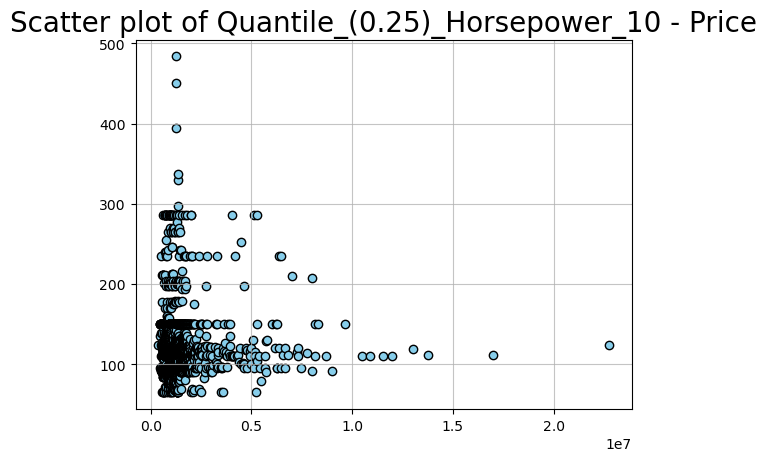

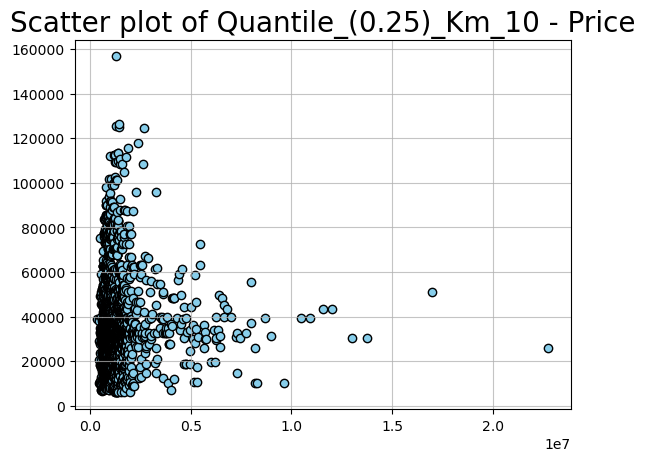

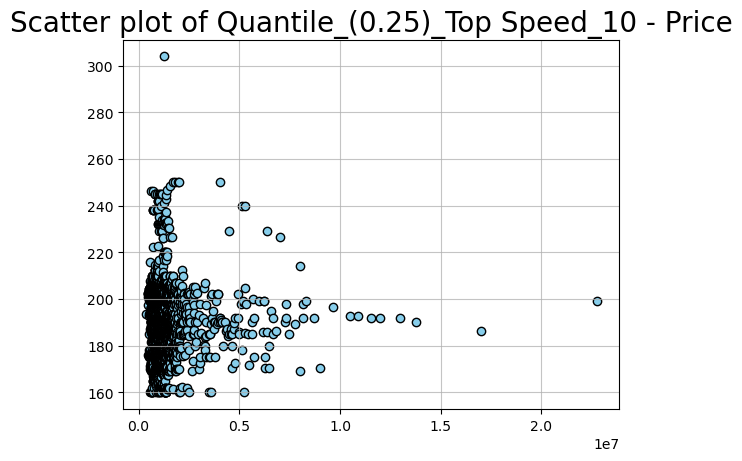

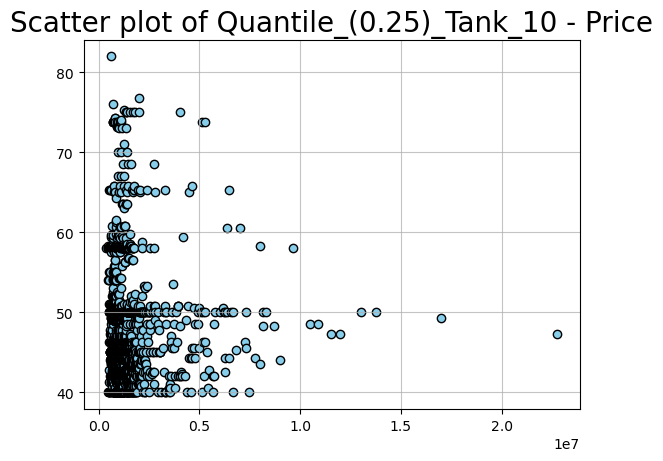

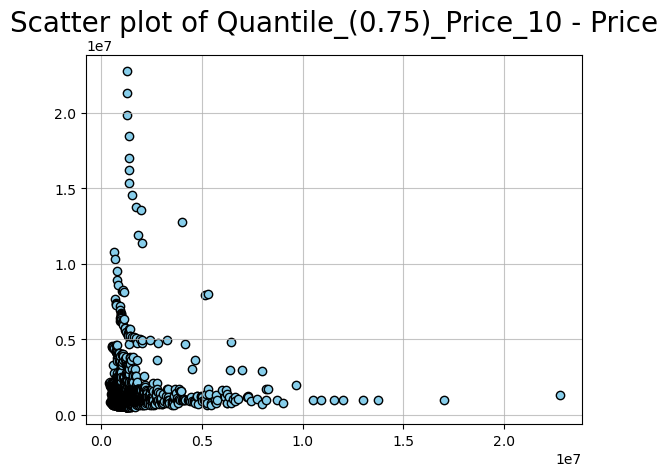

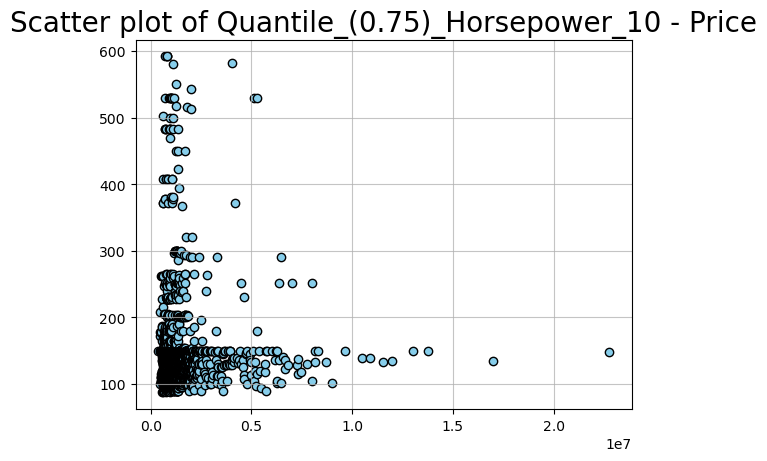

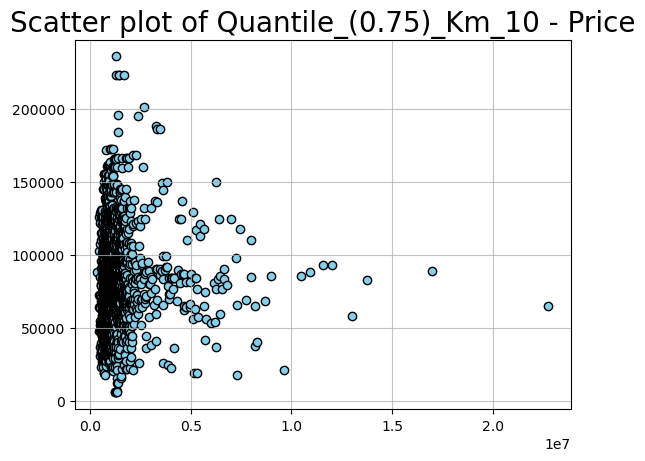

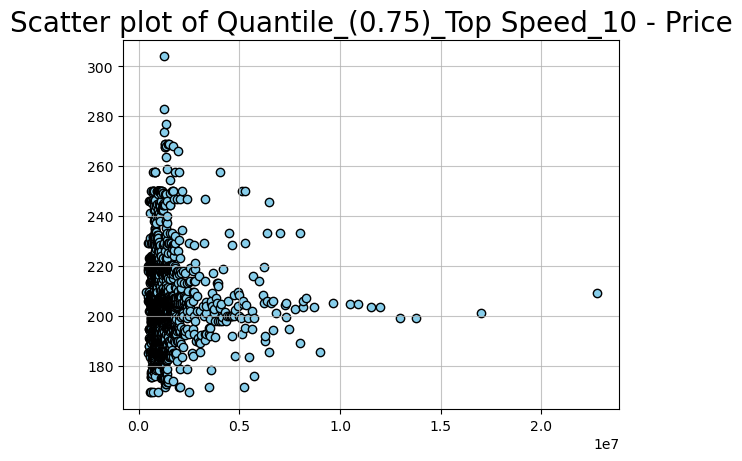

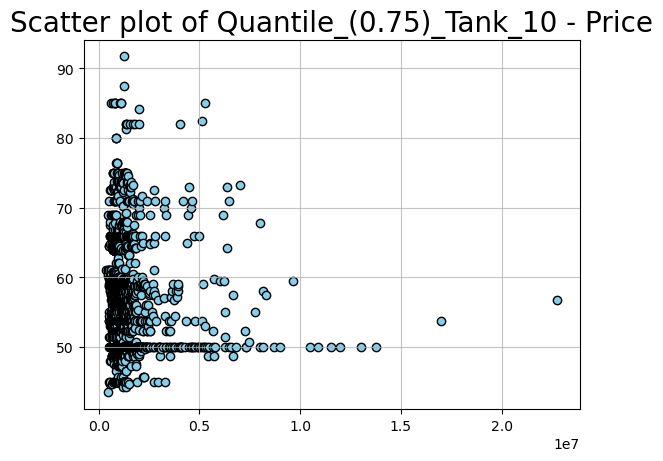

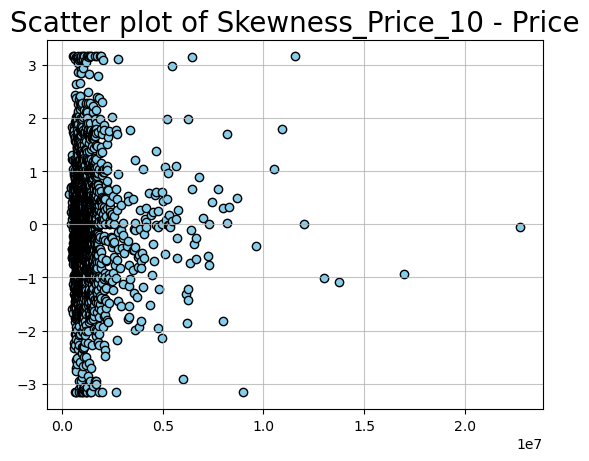

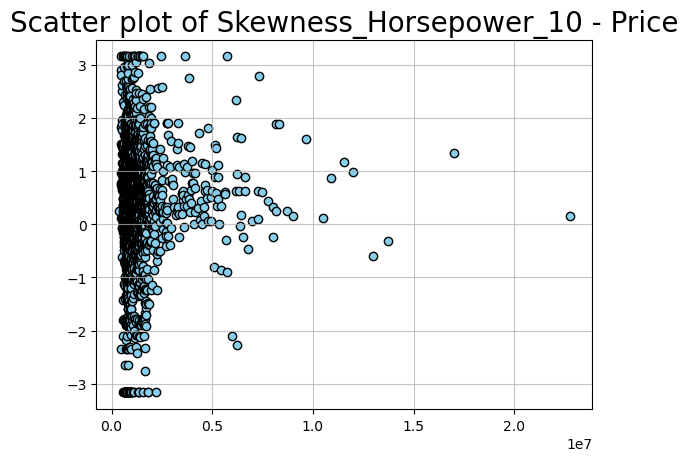

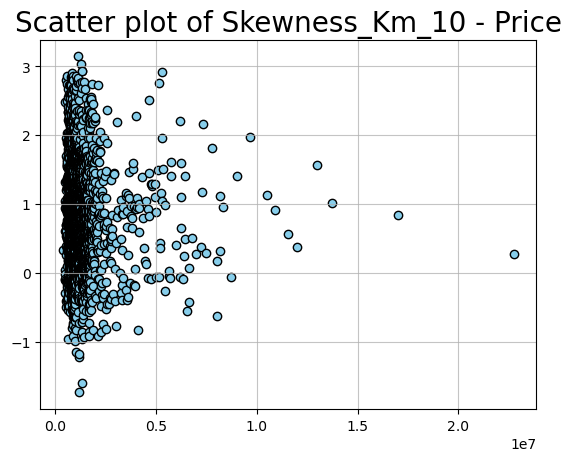

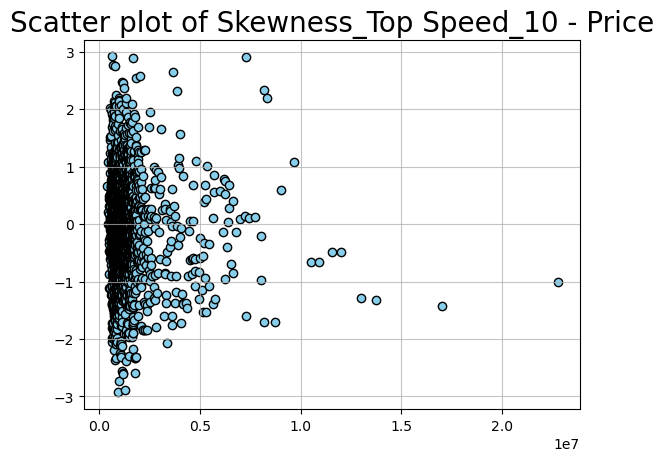

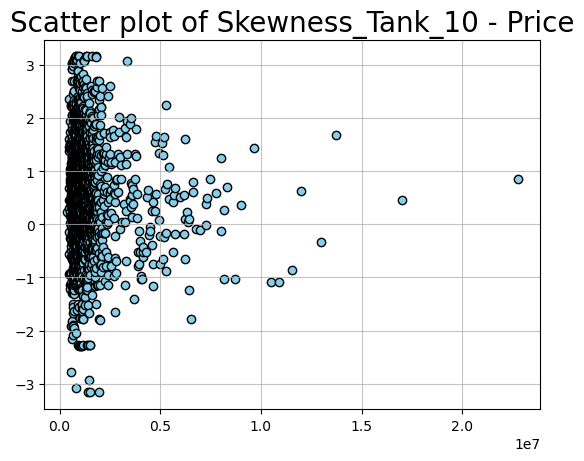

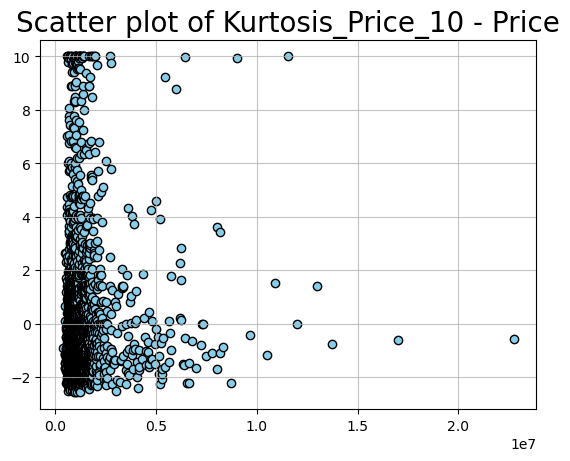

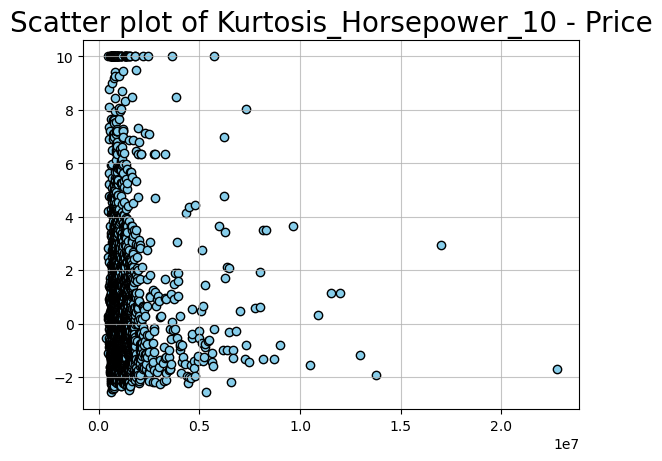

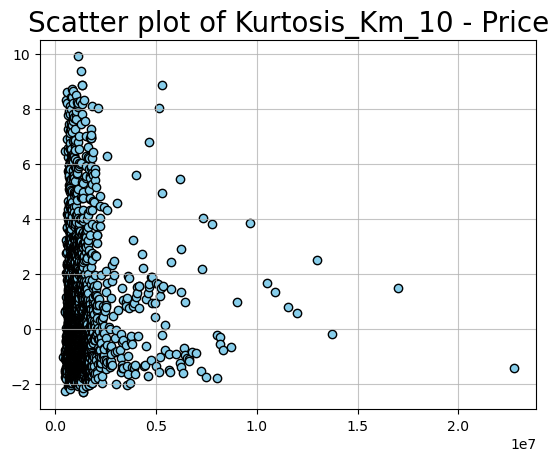

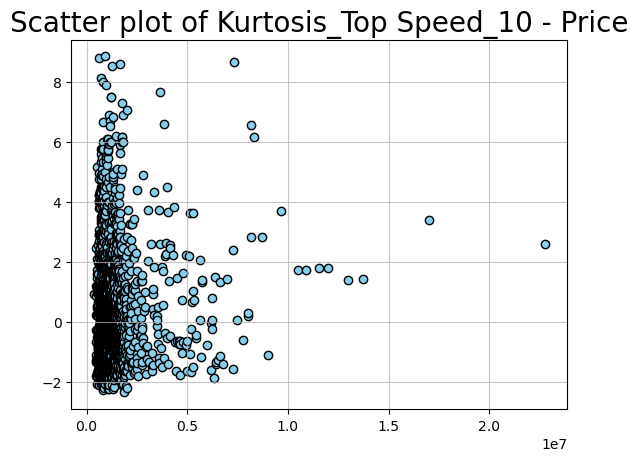

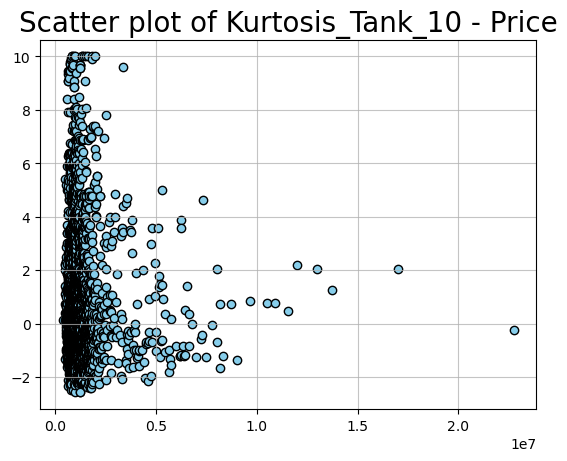

In [9]:
for i in range(len(dataset.columns)):
    plot.scatter(dataset['Price'], dataset.iloc[:,i], color='skyblue', edgecolor='black')
    plot.title(f'Scatter plot of {dataset.columns[i]} - Price',fontsize=20)
    plot.grid(alpha=0.75)
    plot.show()

    Histogram Plot

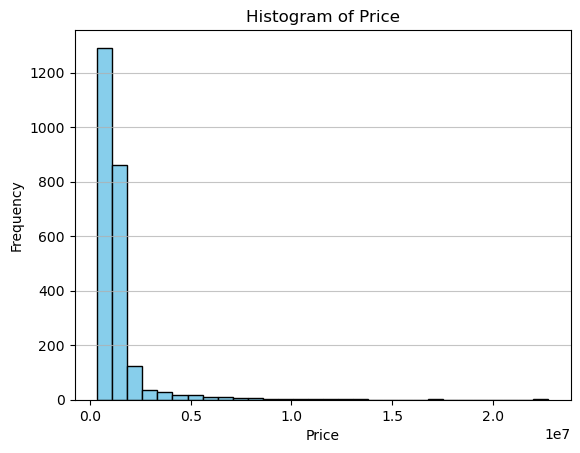

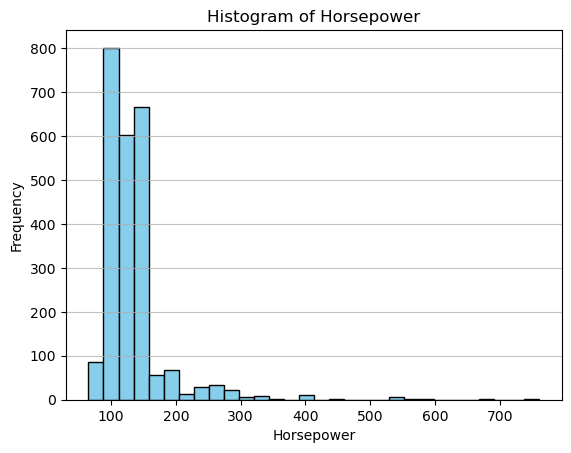

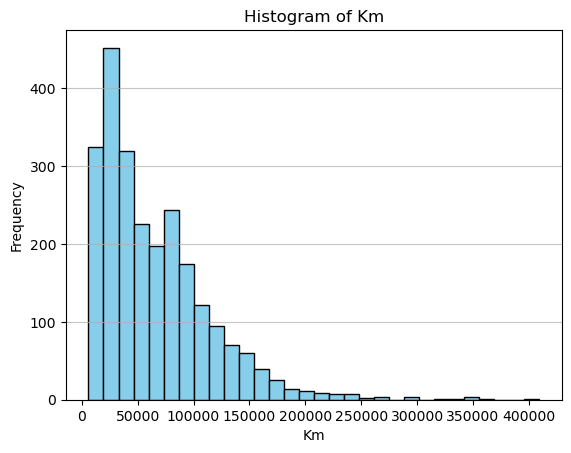

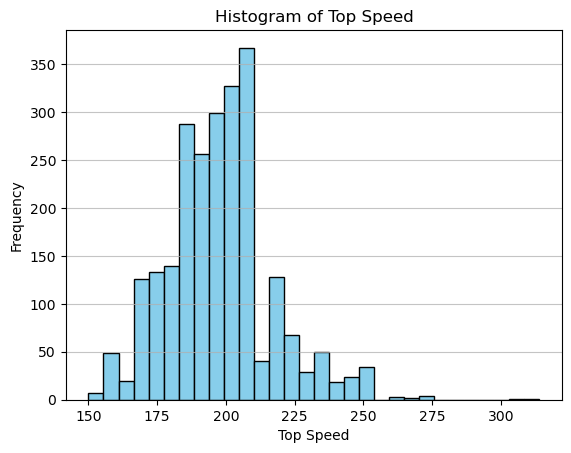

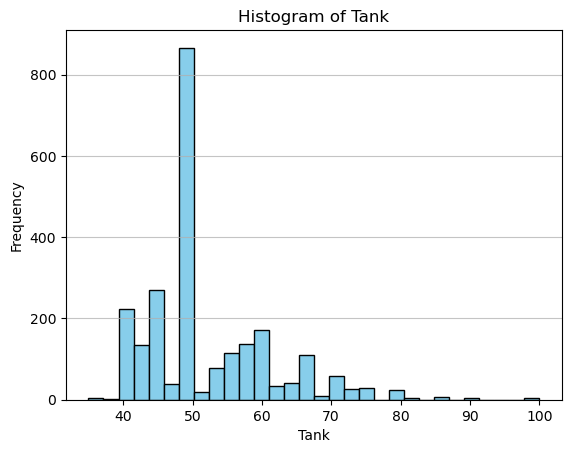

In [11]:
for column in datasetNumericNonCategoricalColumns:
    plot.hist(dataset[column], bins=30, color='skyblue', edgecolor='black')
    plot.xlabel(column)
    plot.ylabel('Frequency')
    plot.title(f'Histogram of {column}')
    plot.grid(axis='y',alpha=0.75)
    plot.show()

    Violin Plot

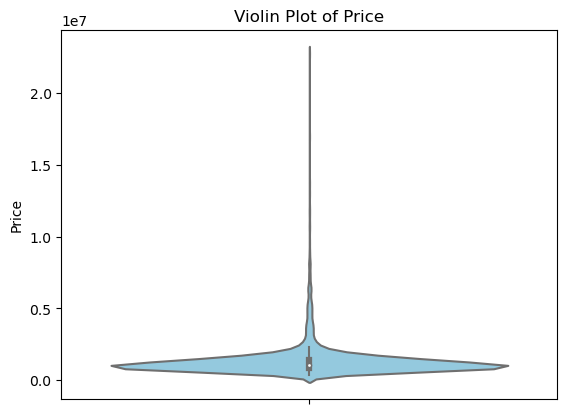

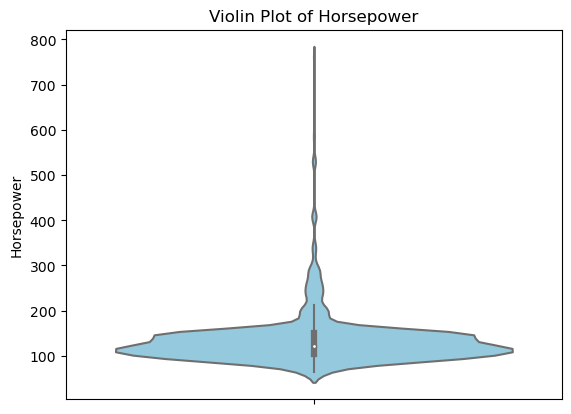

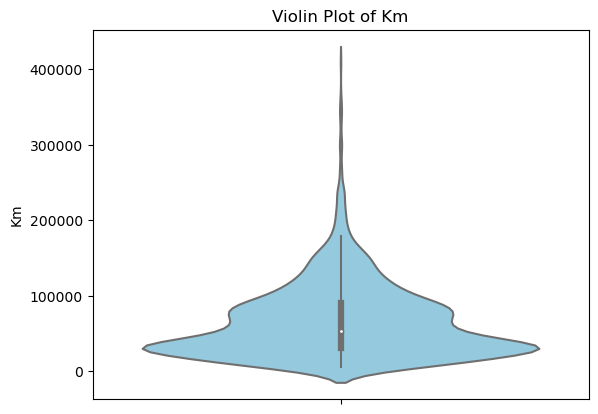

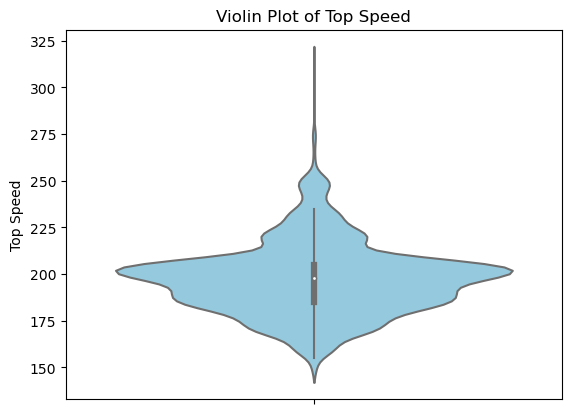

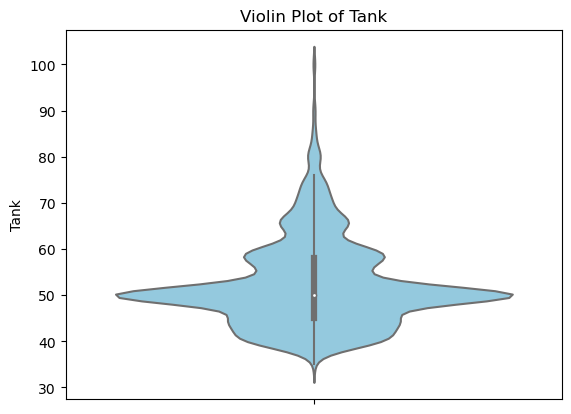

In [13]:
for column in datasetNumericNonCategoricalColumns:
    seaborn.violinplot(y=dataset[column], color='skyblue')
    plot.title(f'Violin Plot of {column}')
    plot.show()

    Box Plot

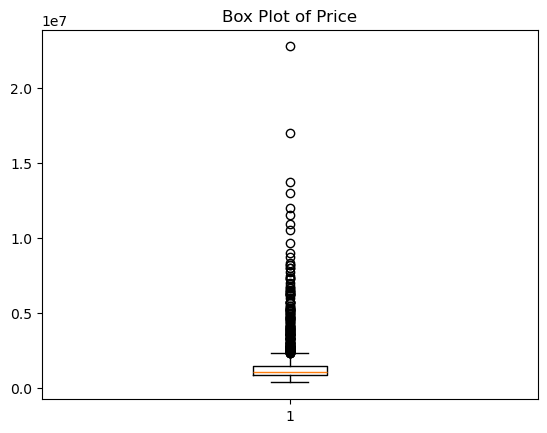

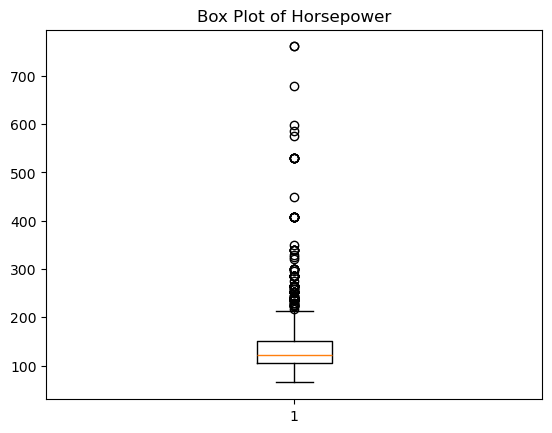

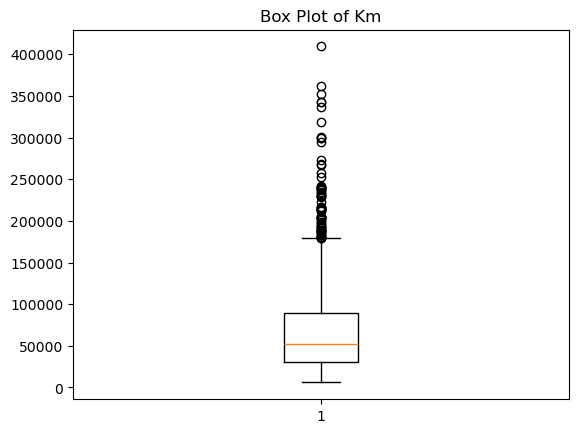

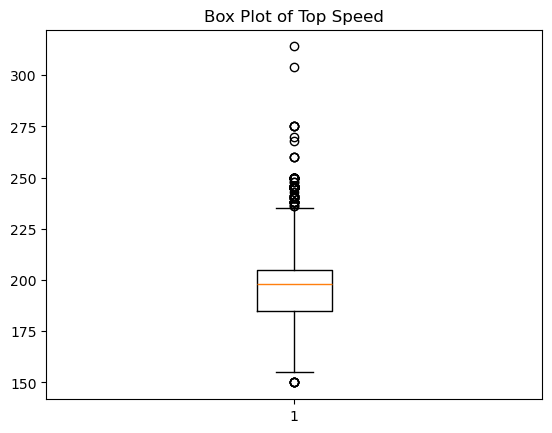

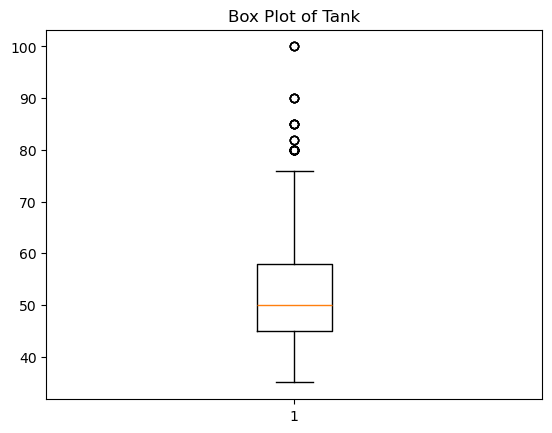

In [15]:
for column in datasetNumericNonCategoricalColumns:
    plot.boxplot(dataset[column])
    plot.title(f'Box Plot of {column}')
    plot.show()

    Bar Chart

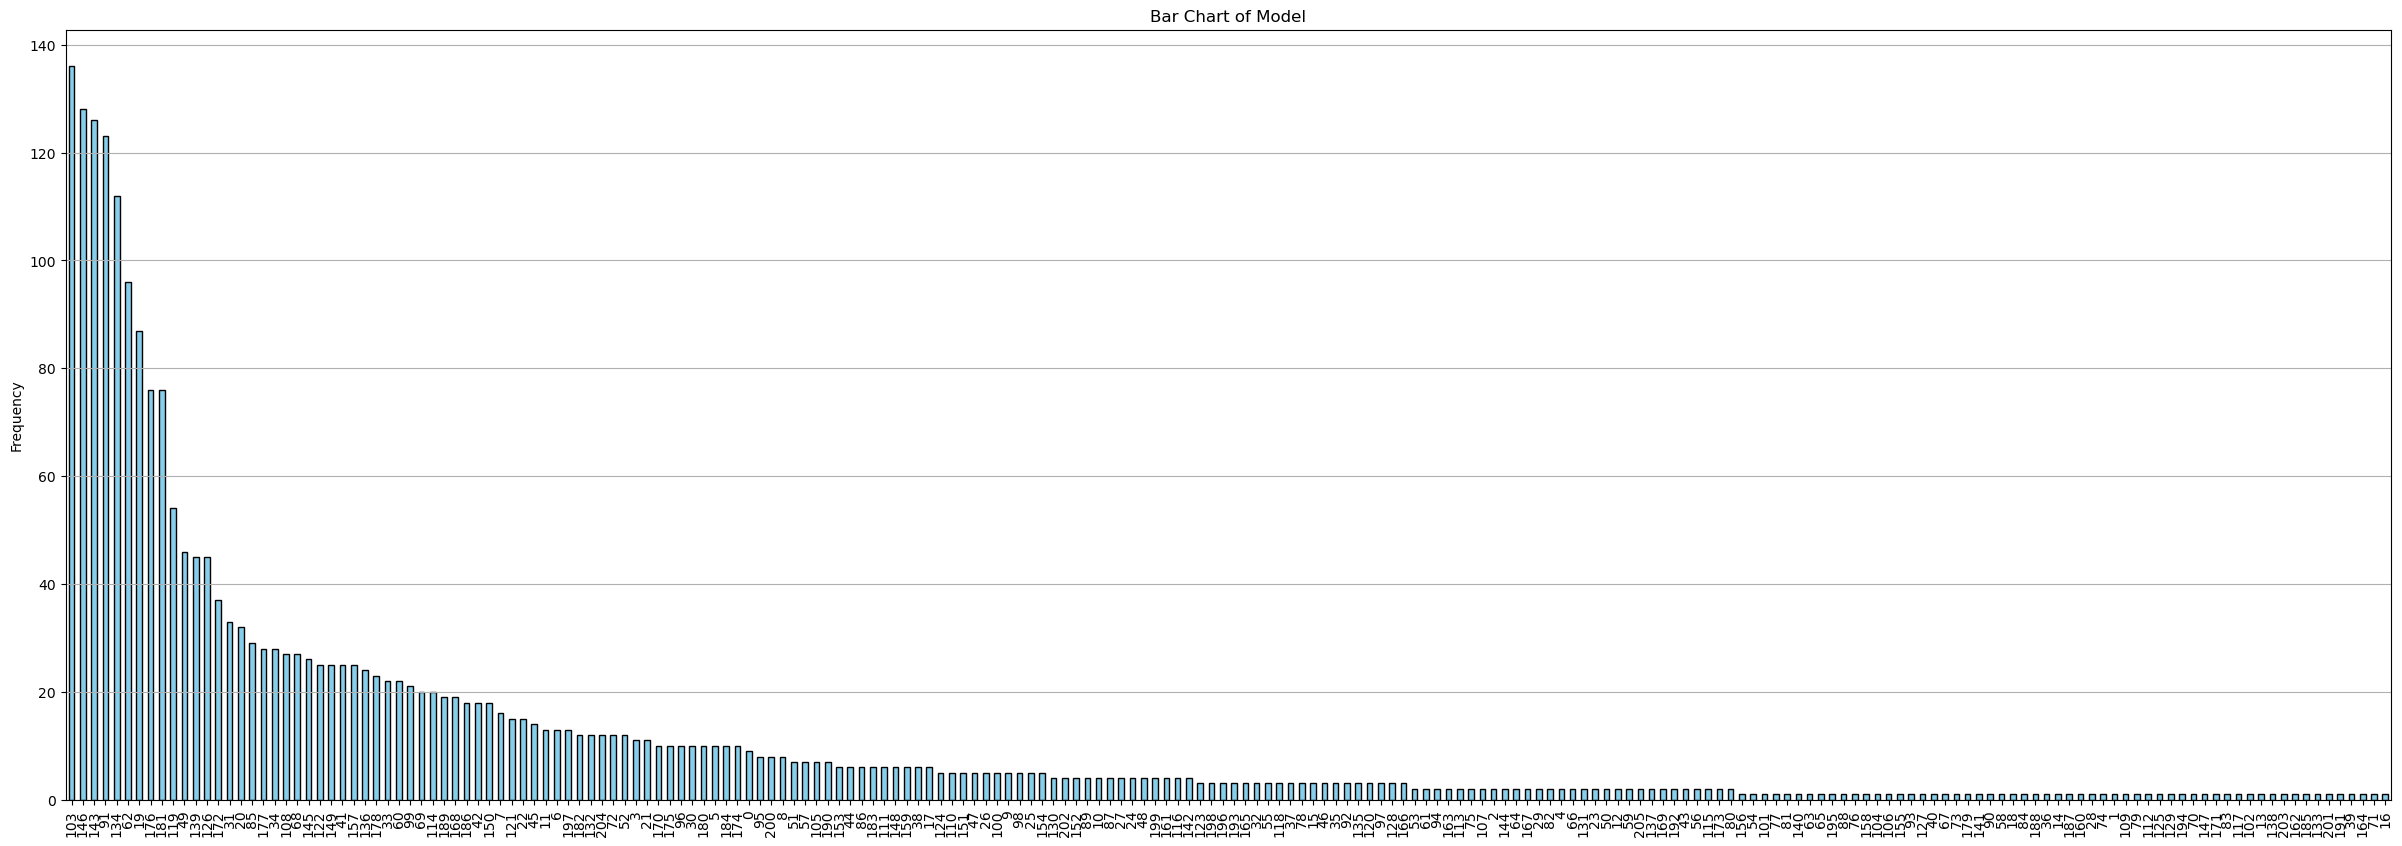

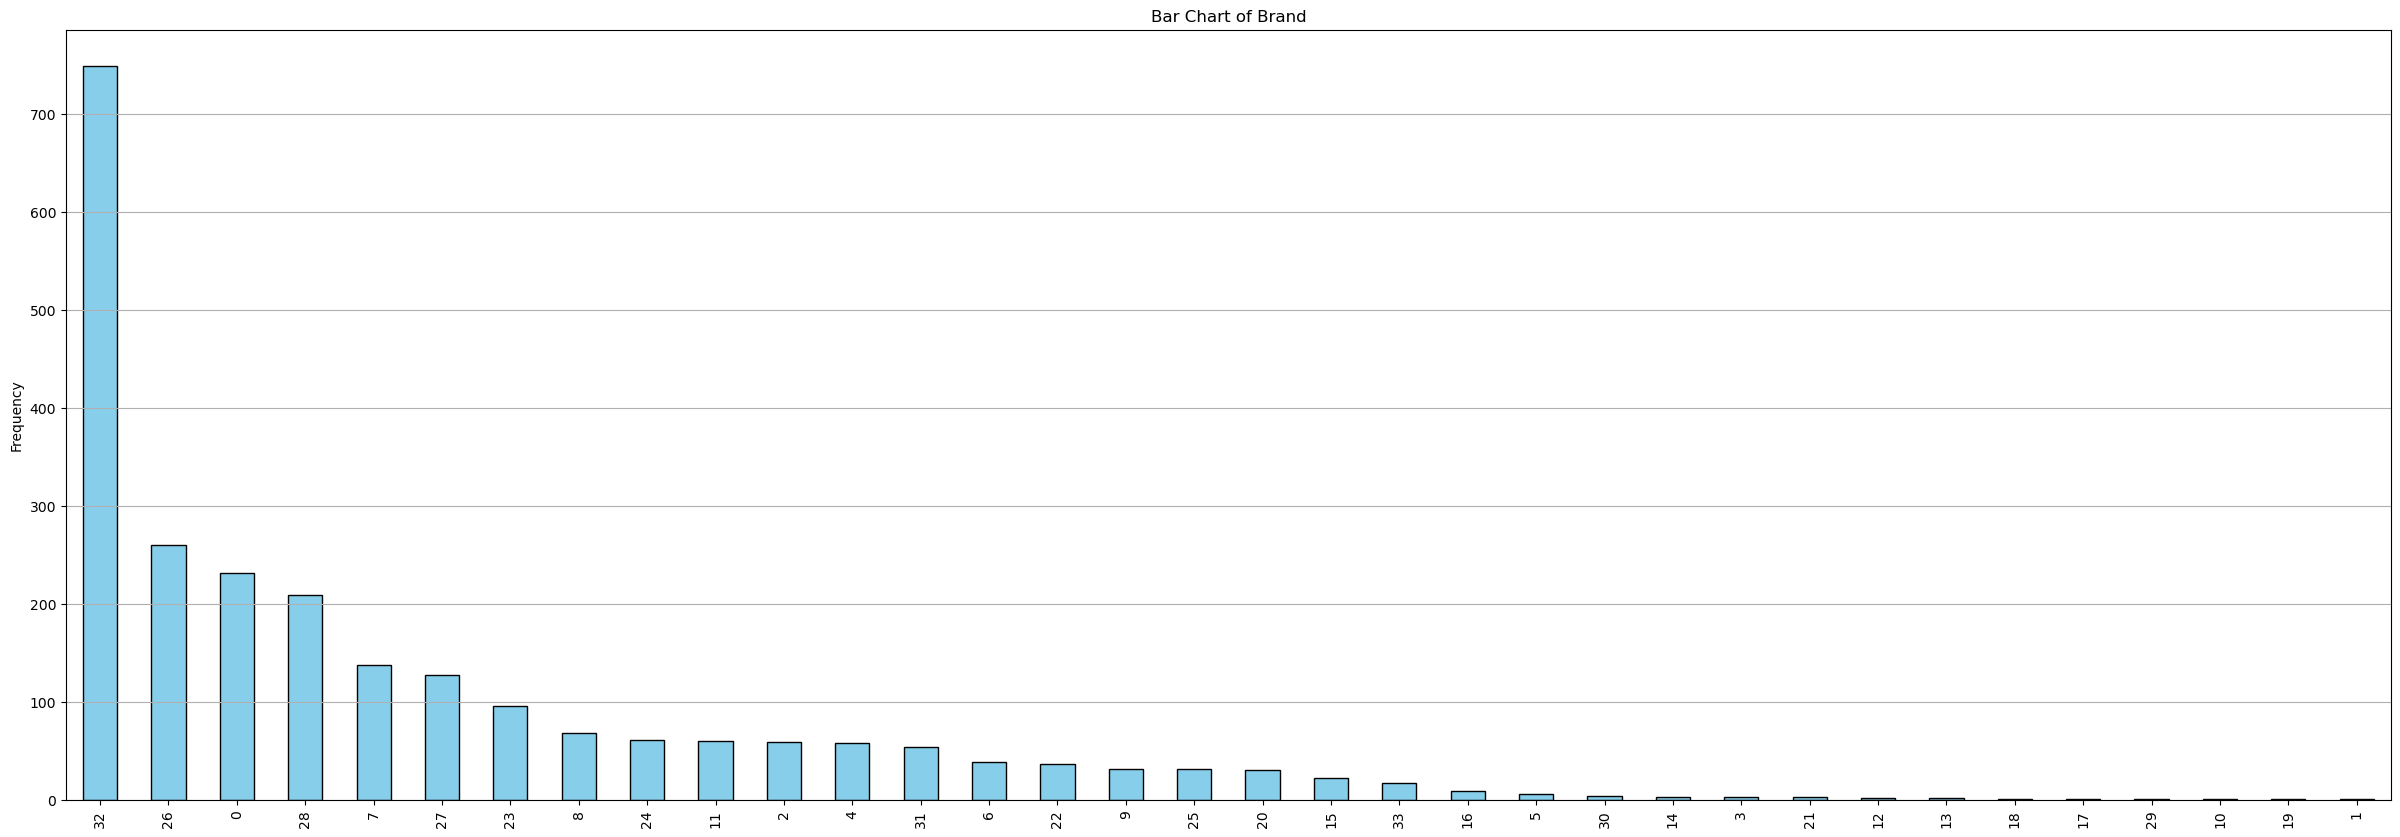

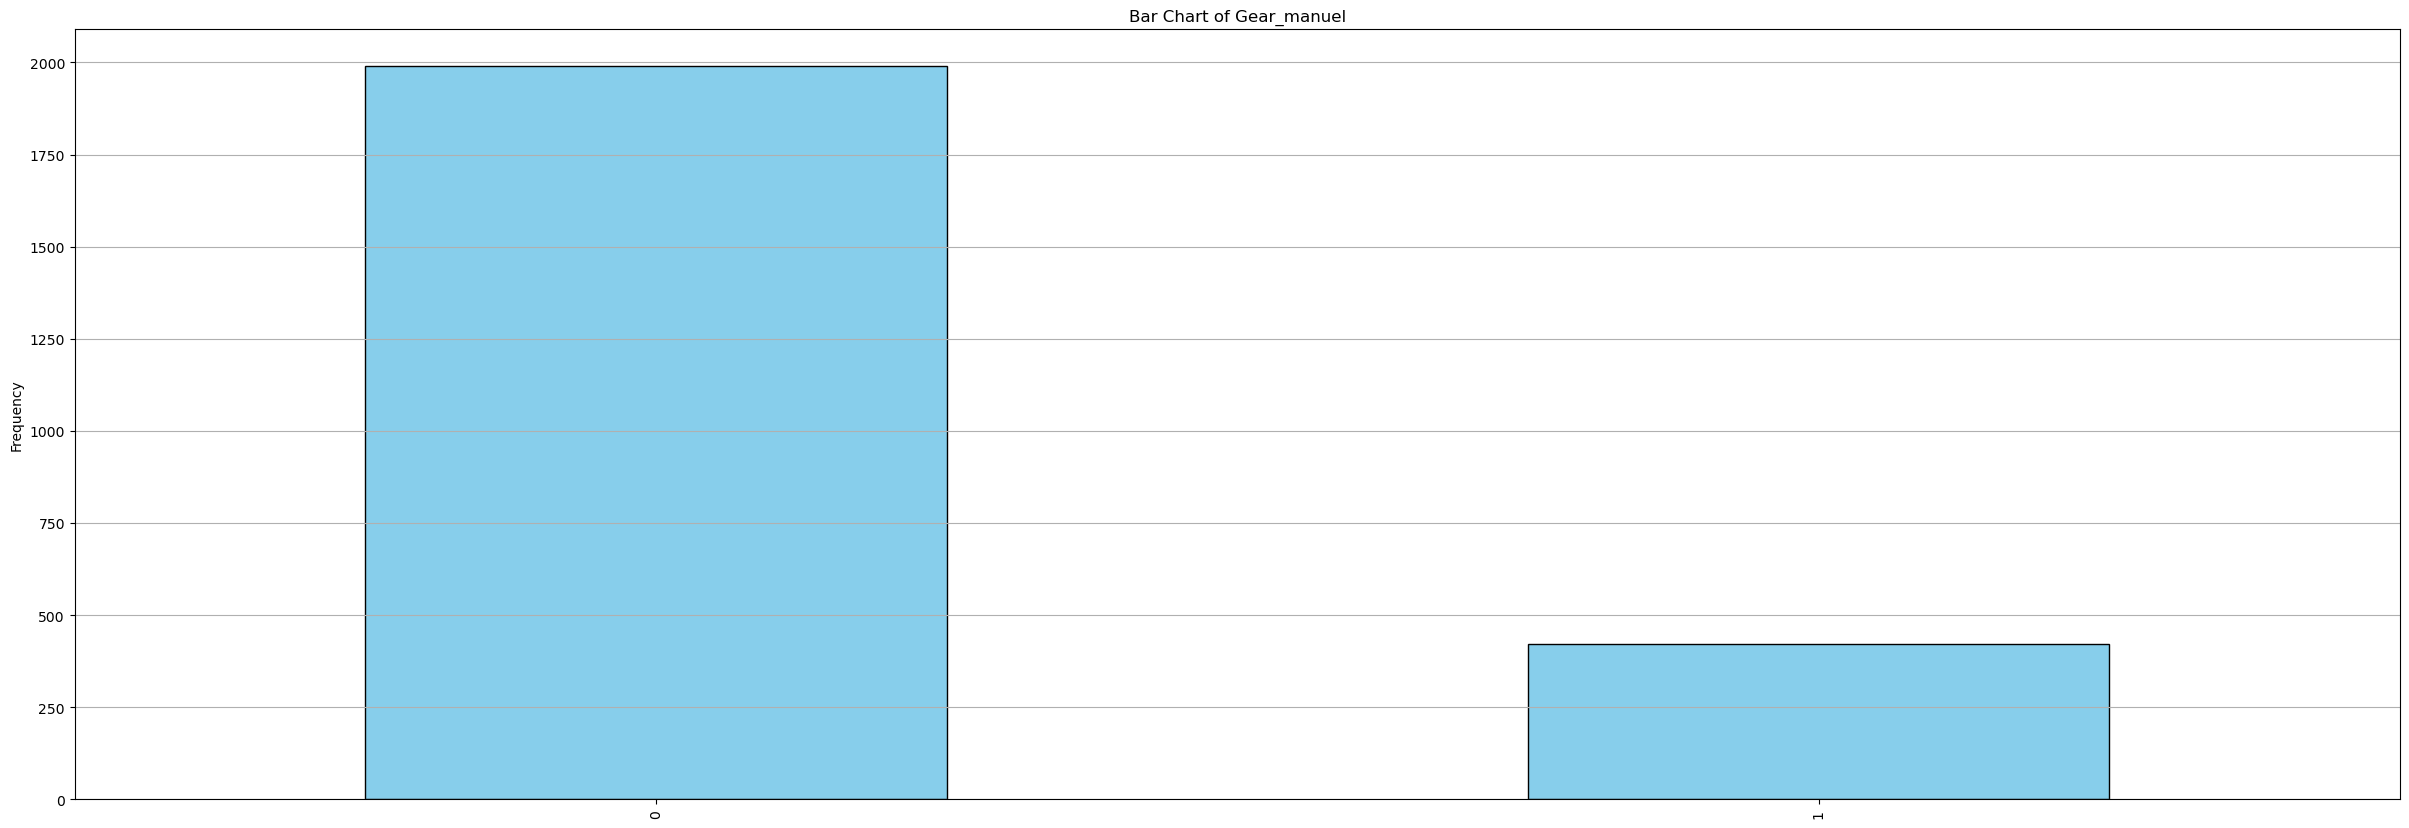

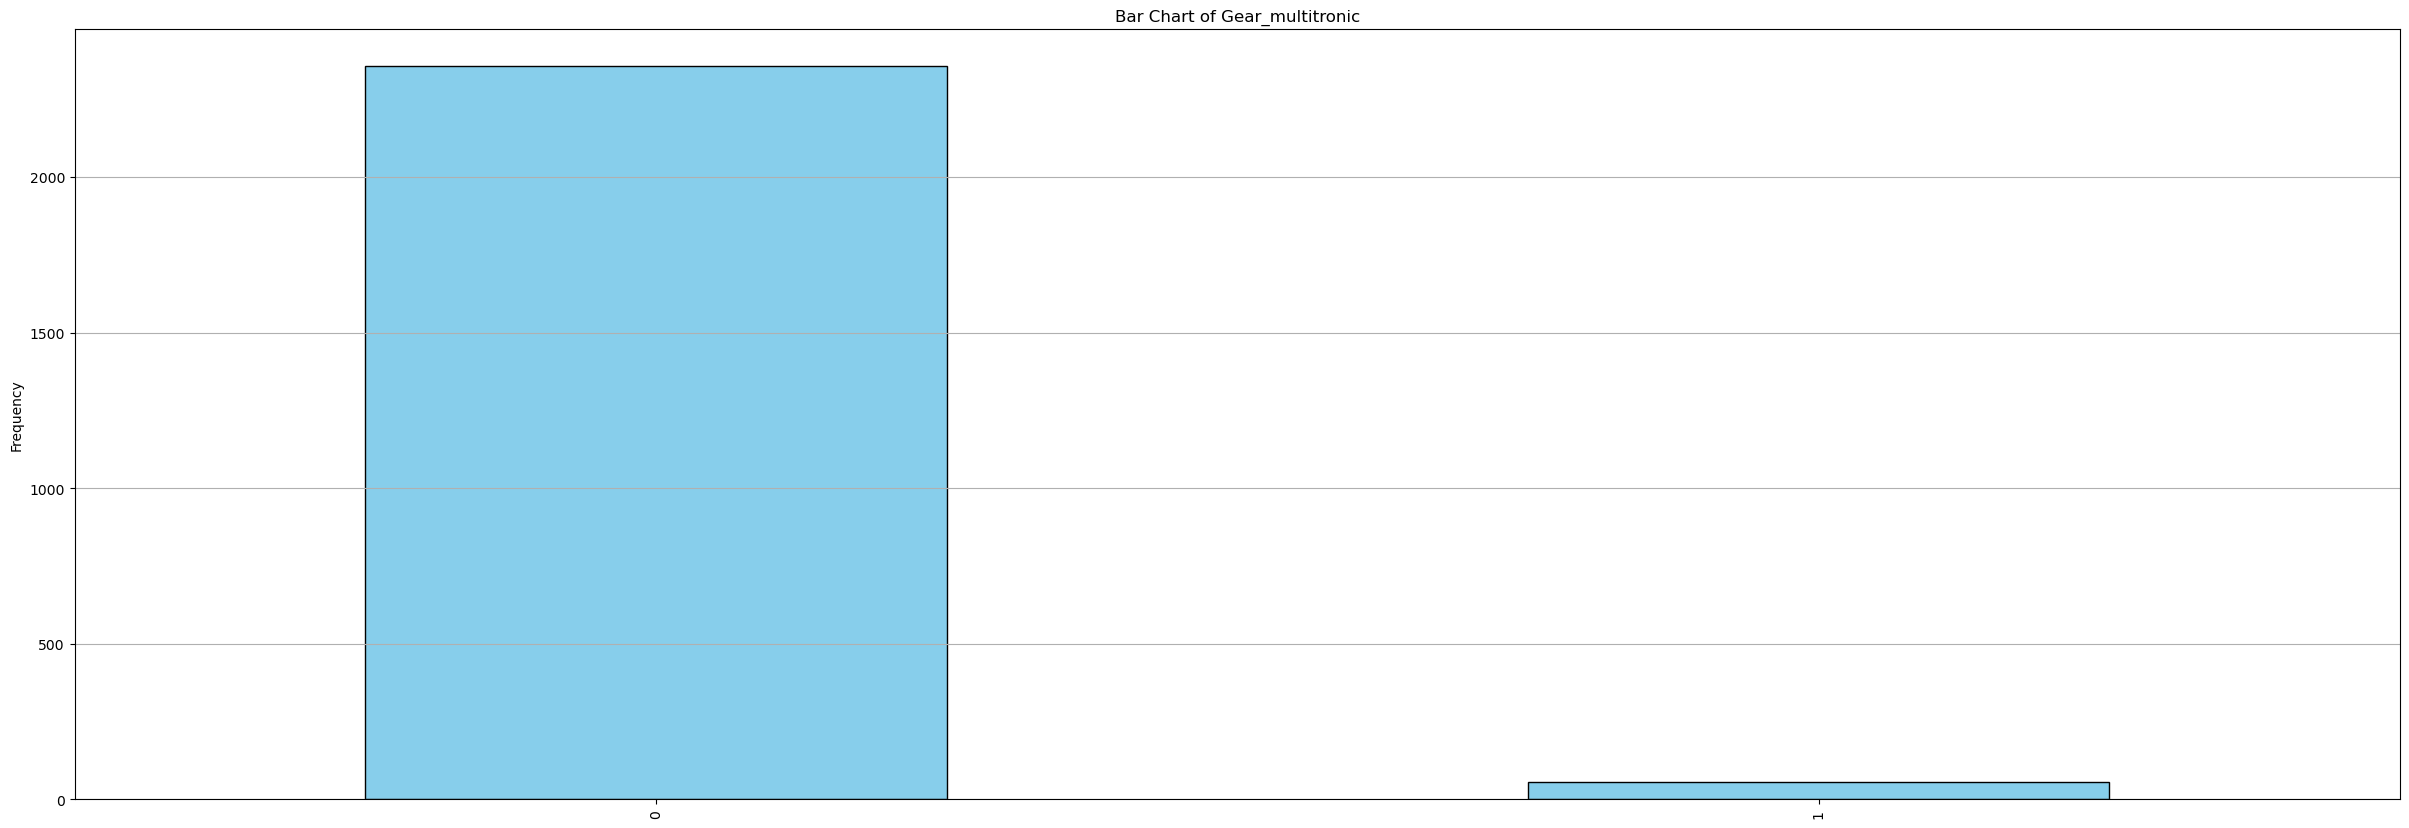

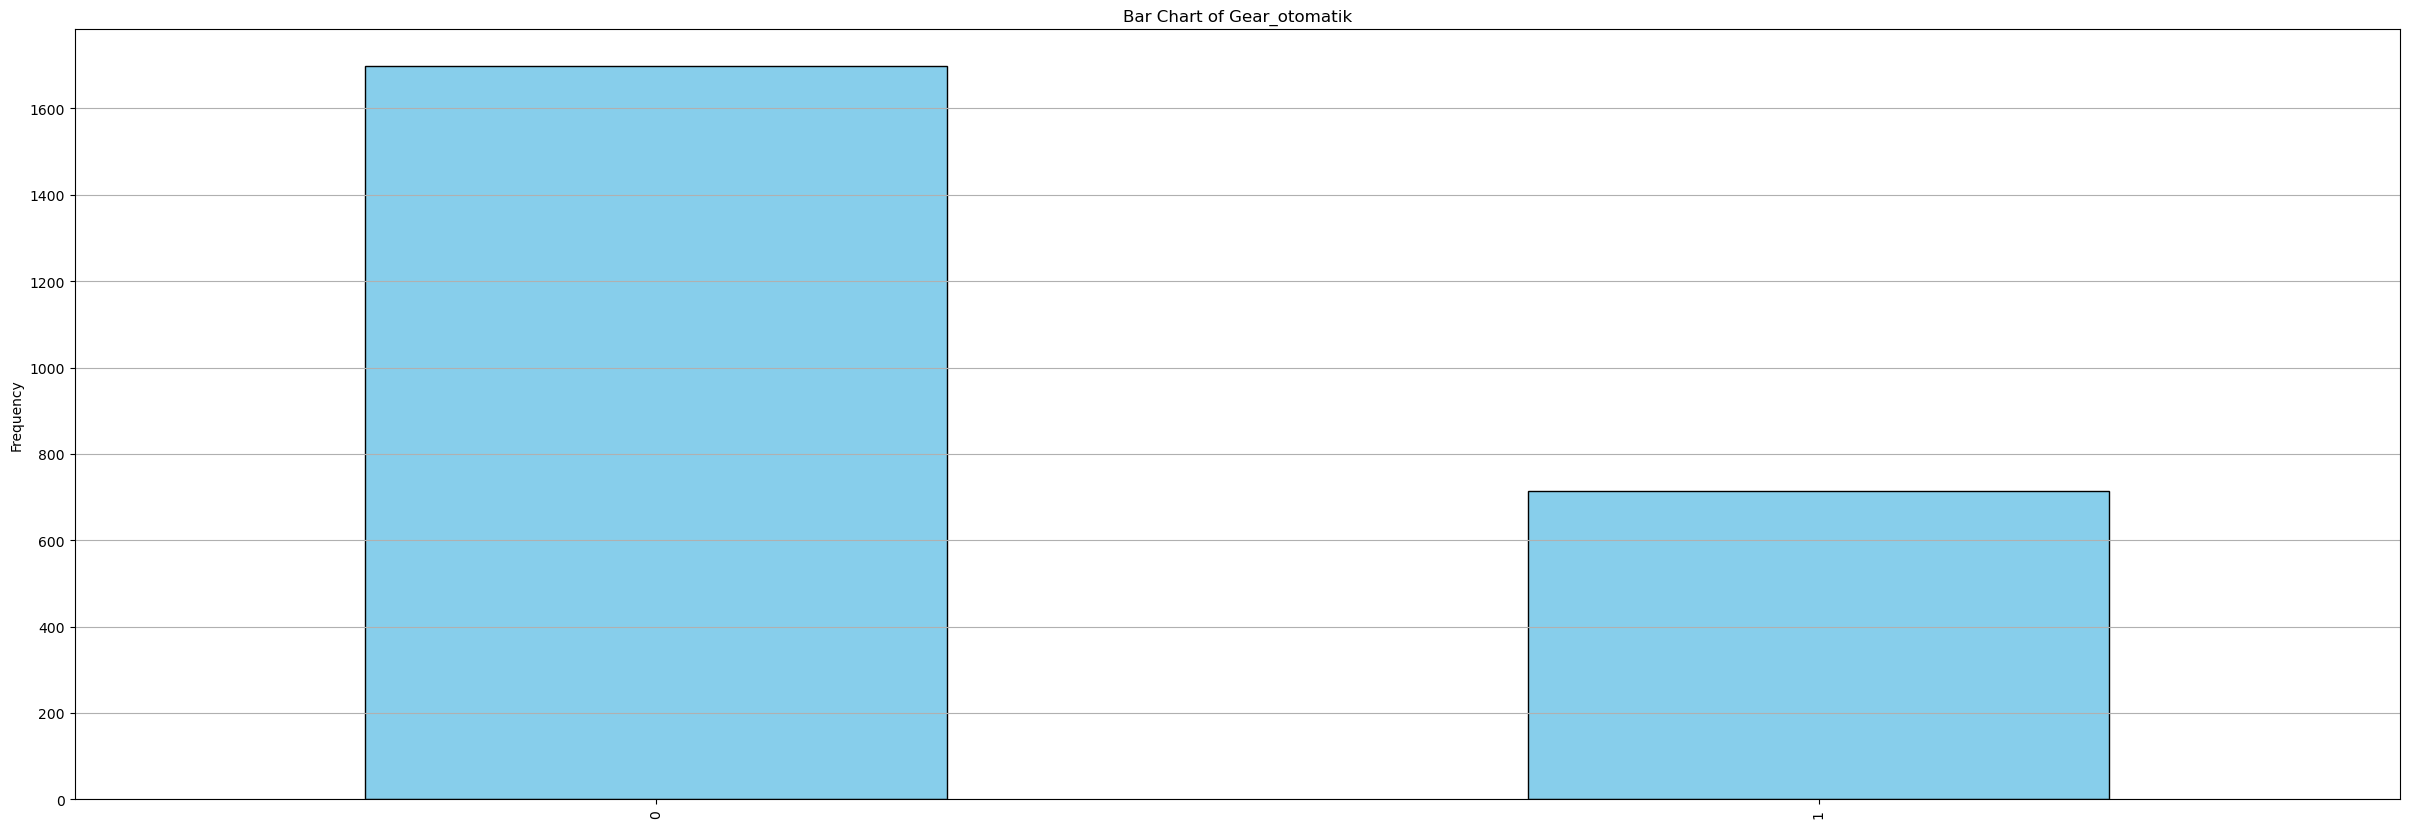

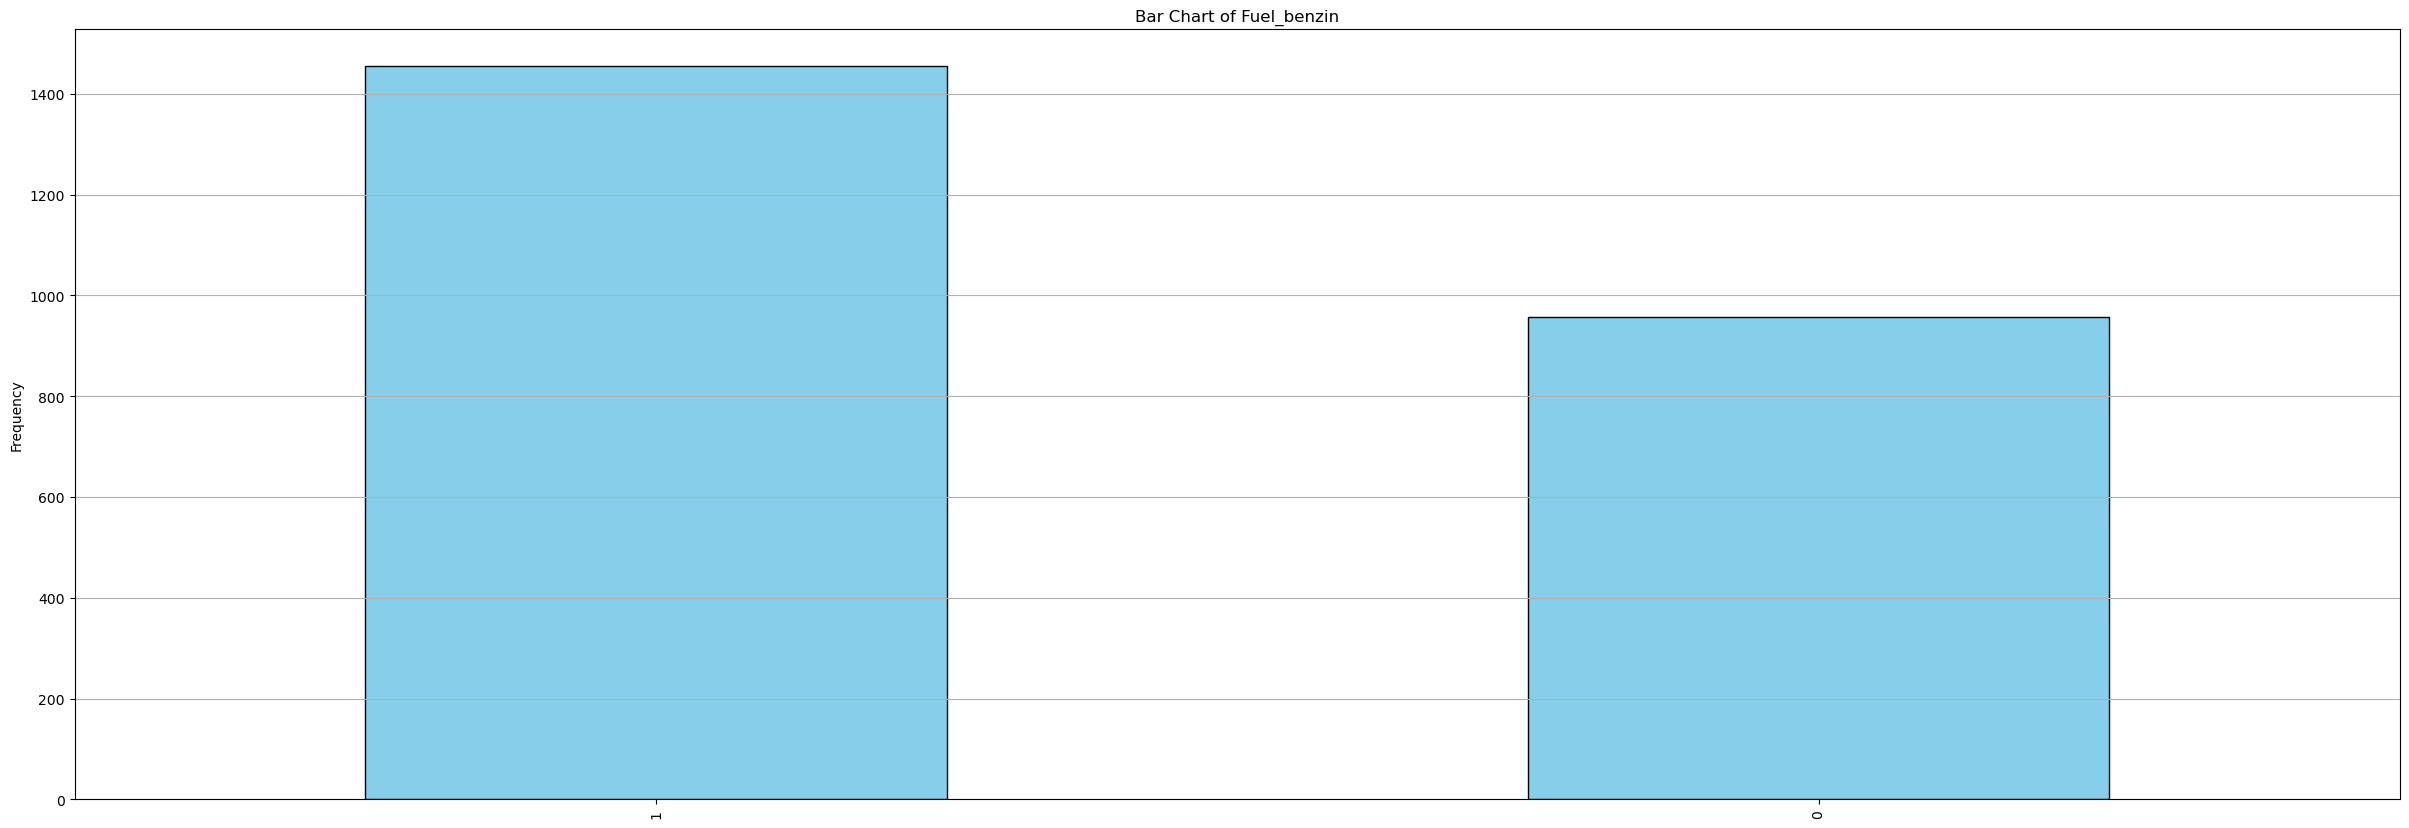

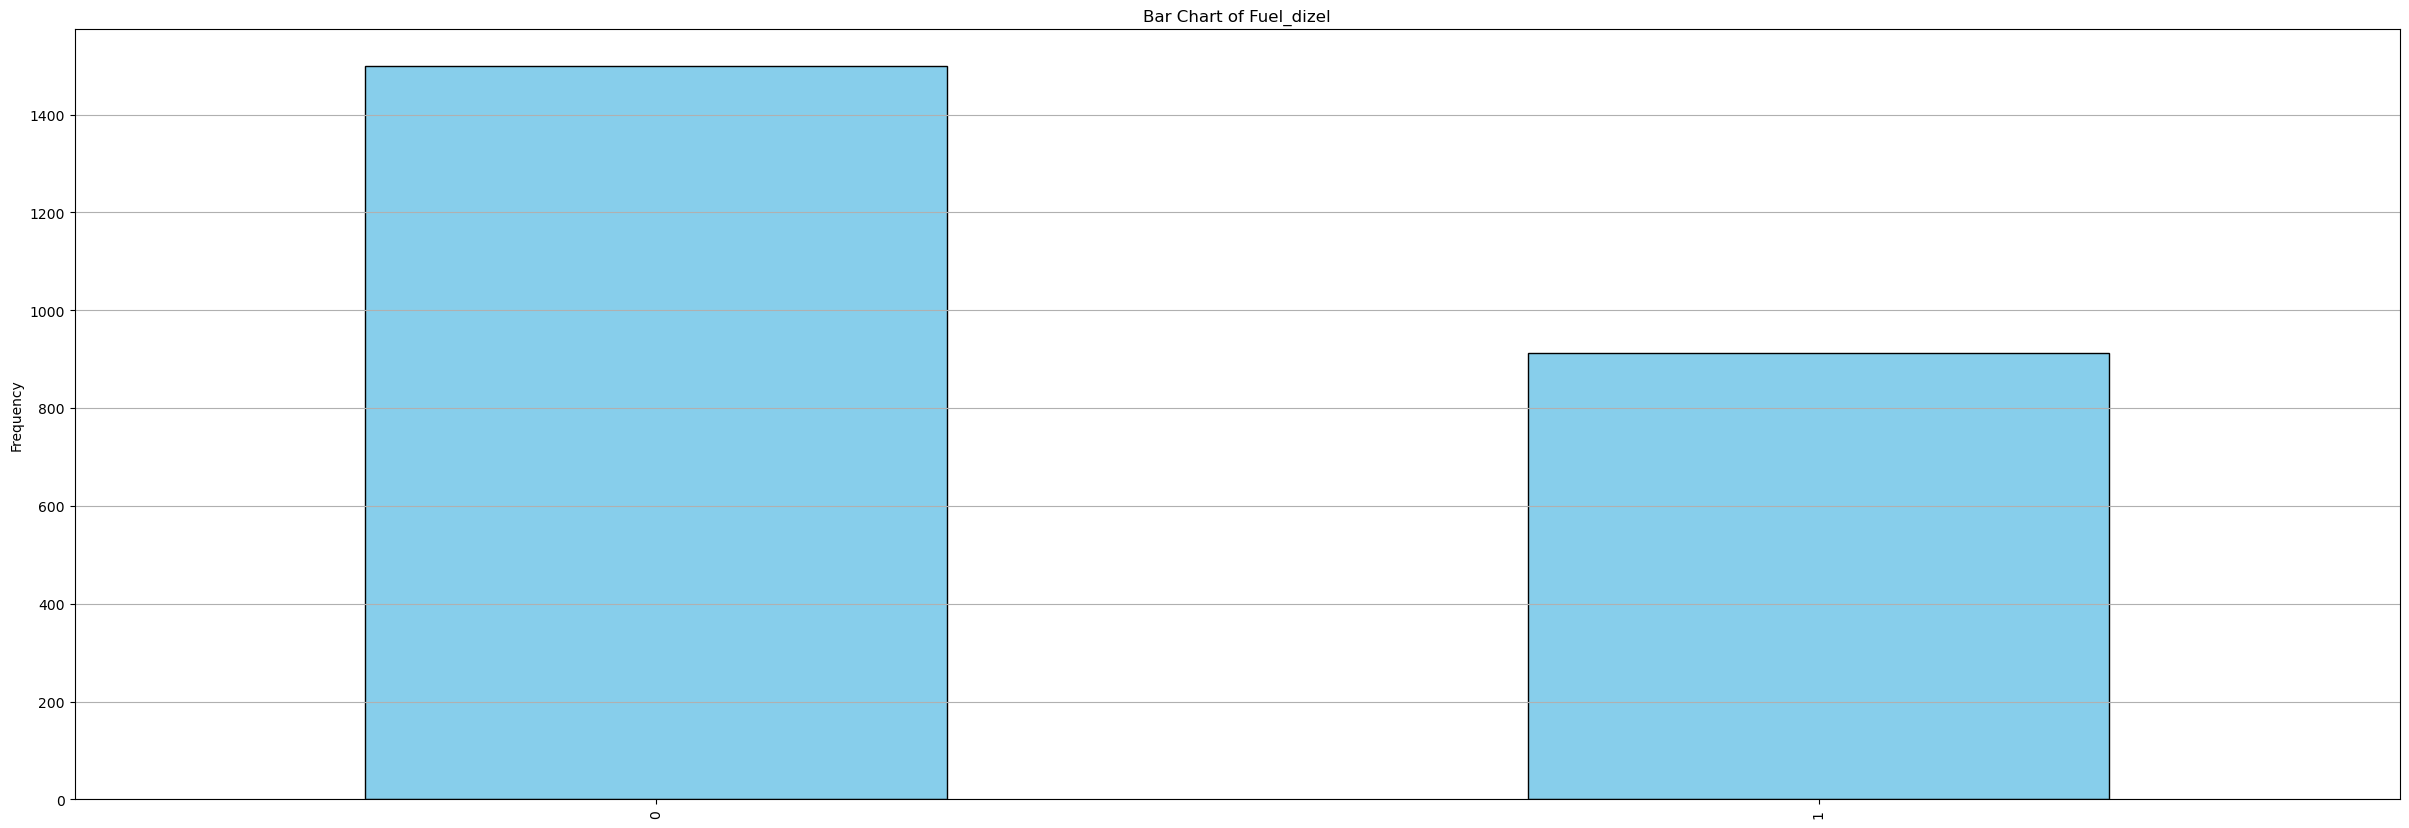

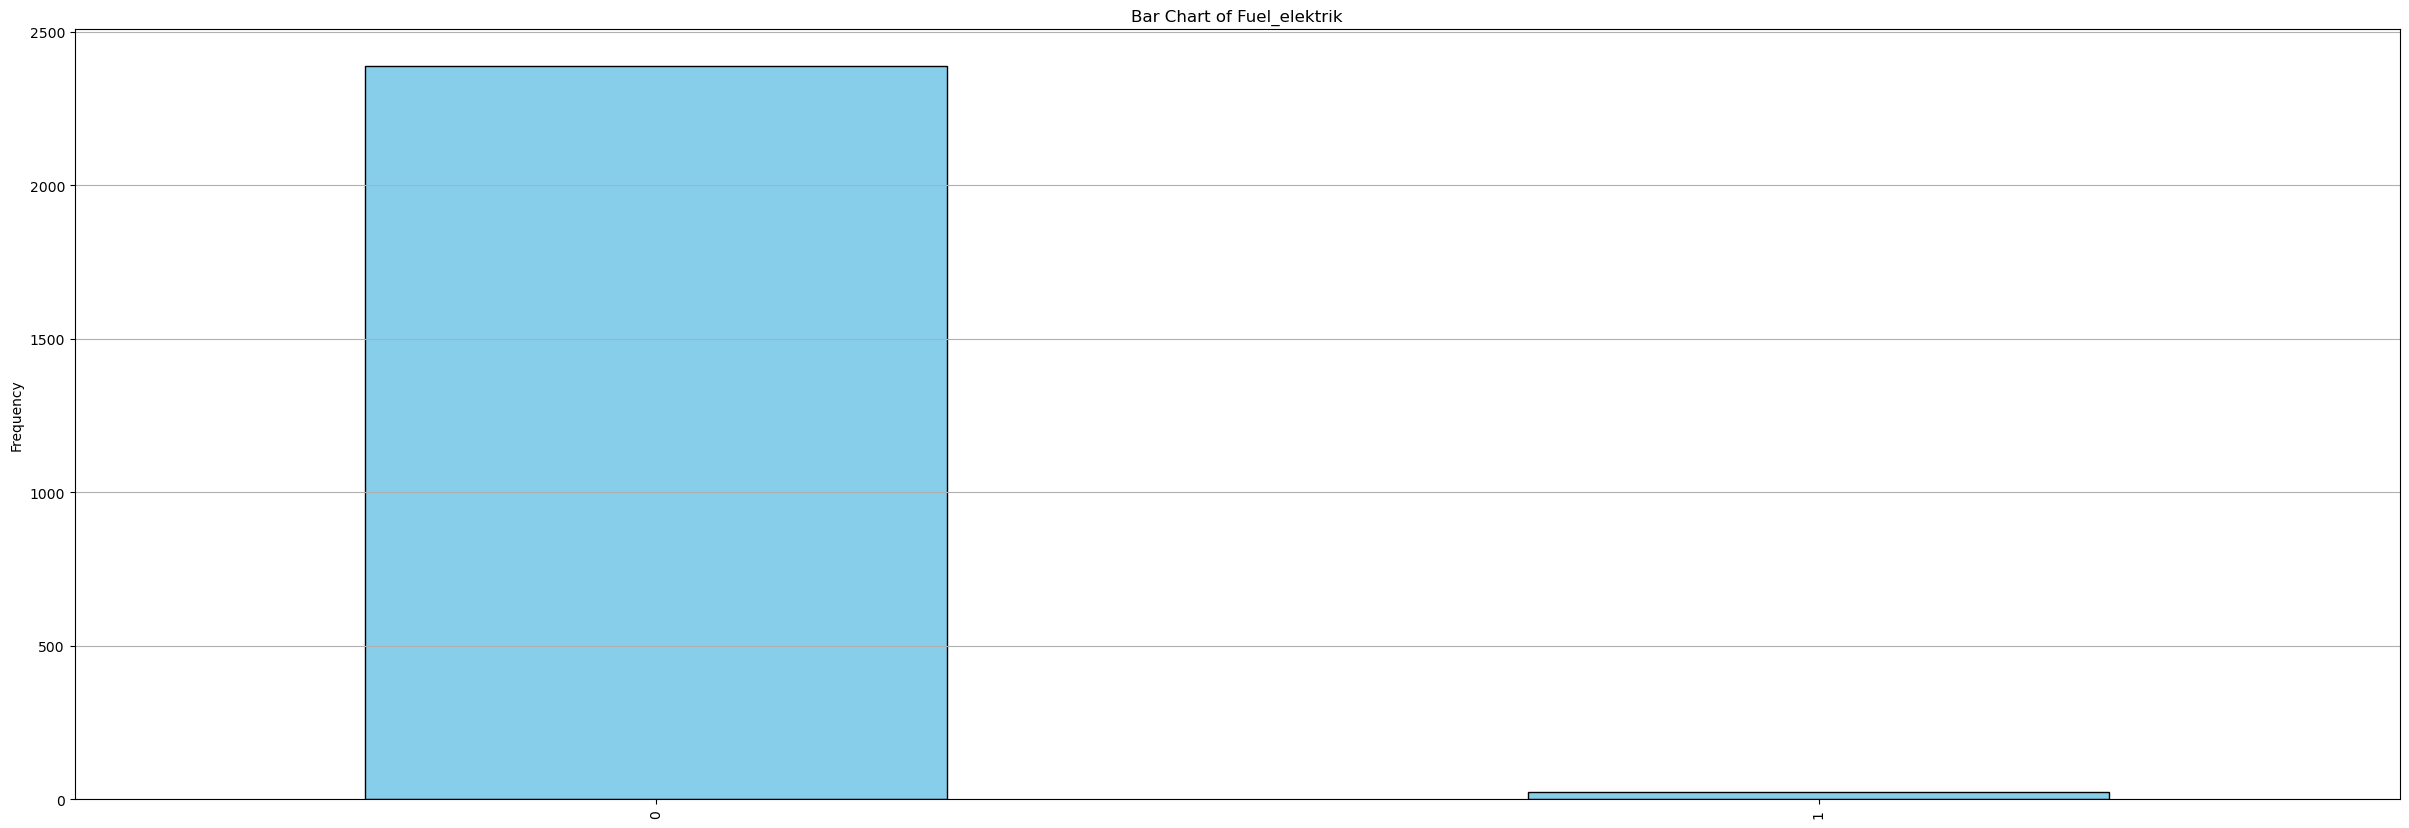

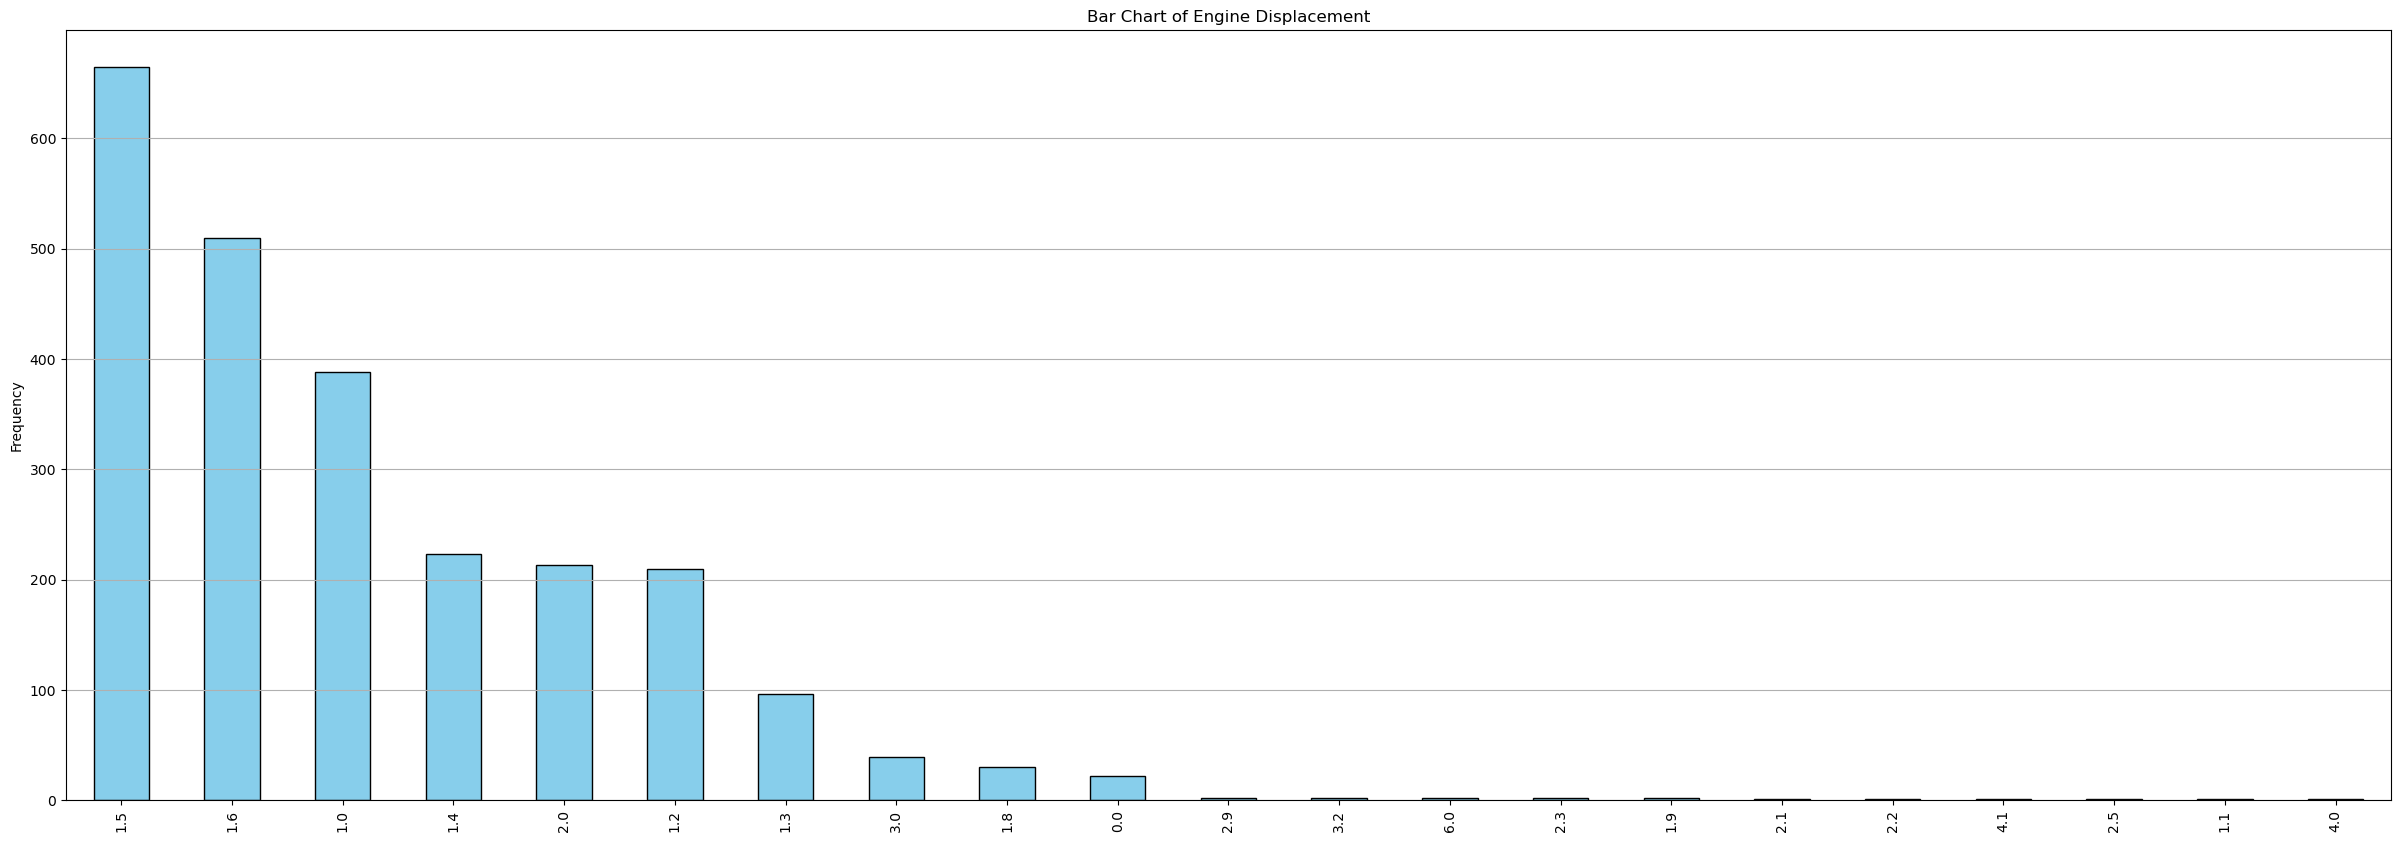

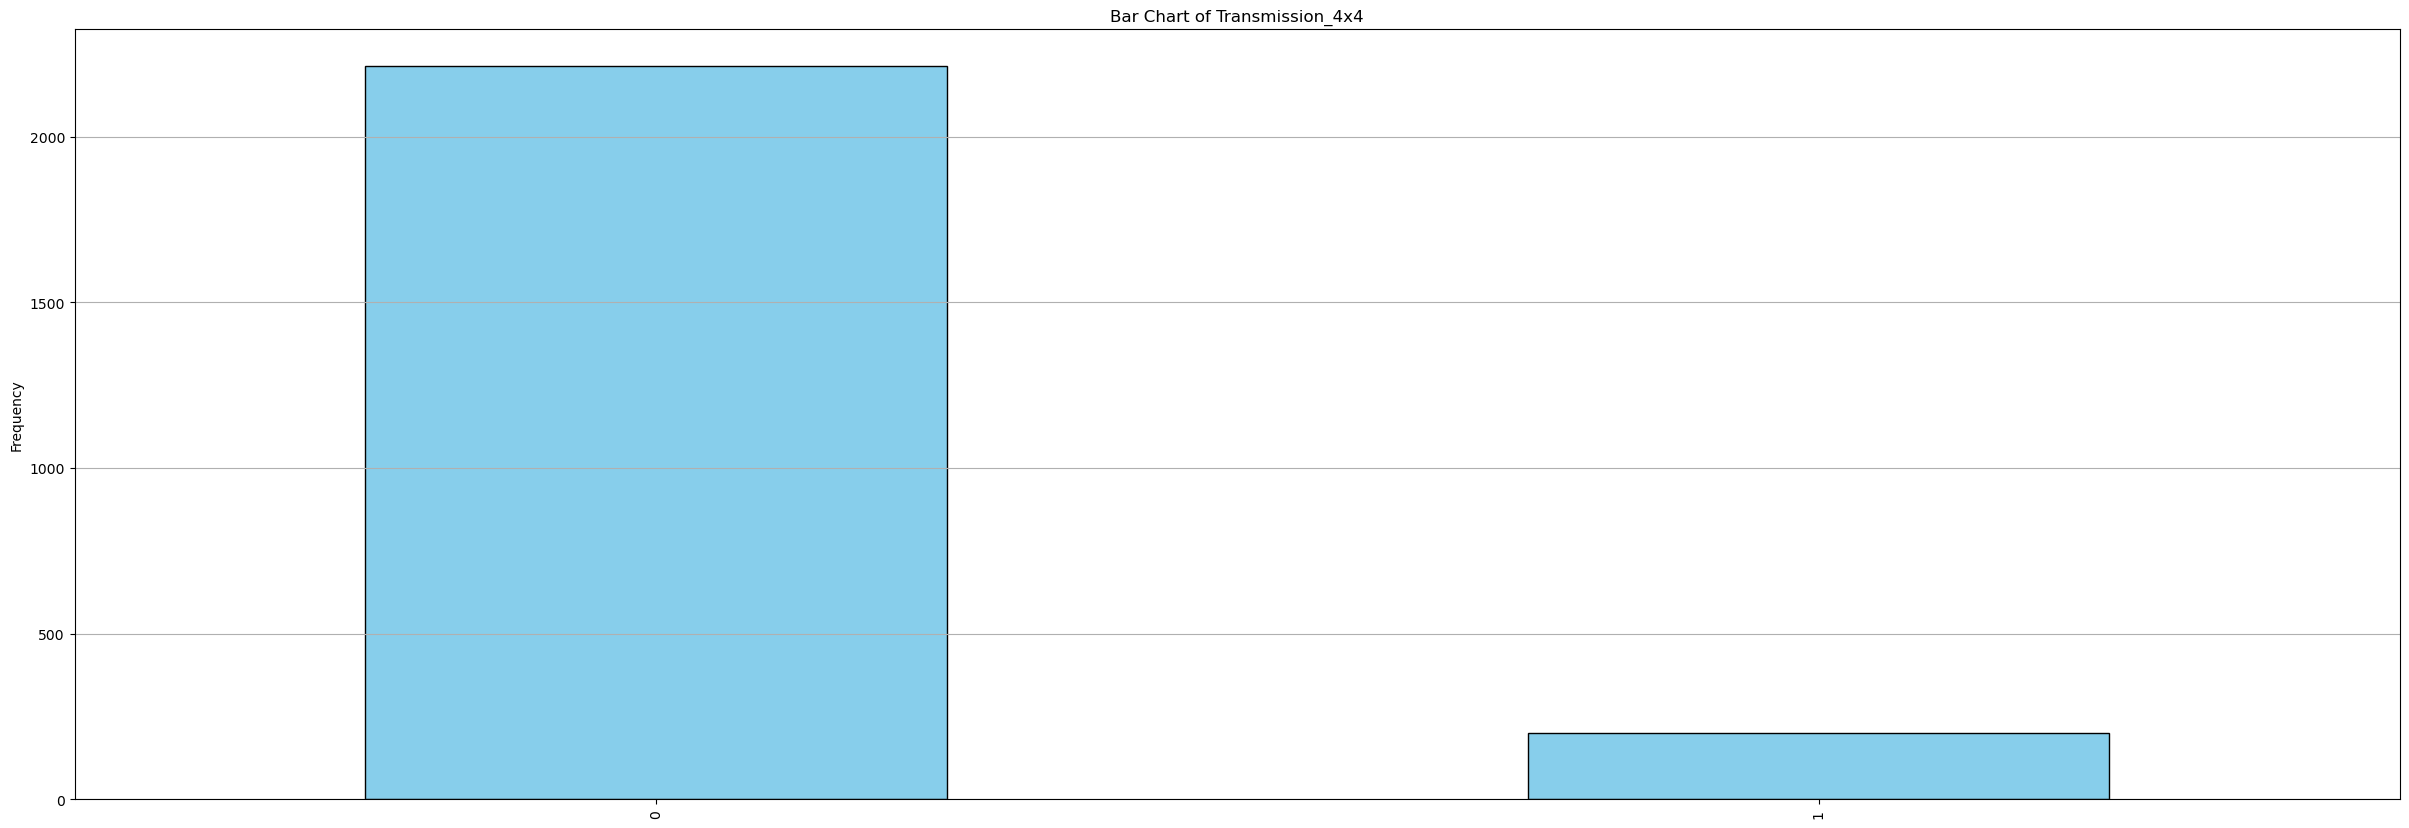

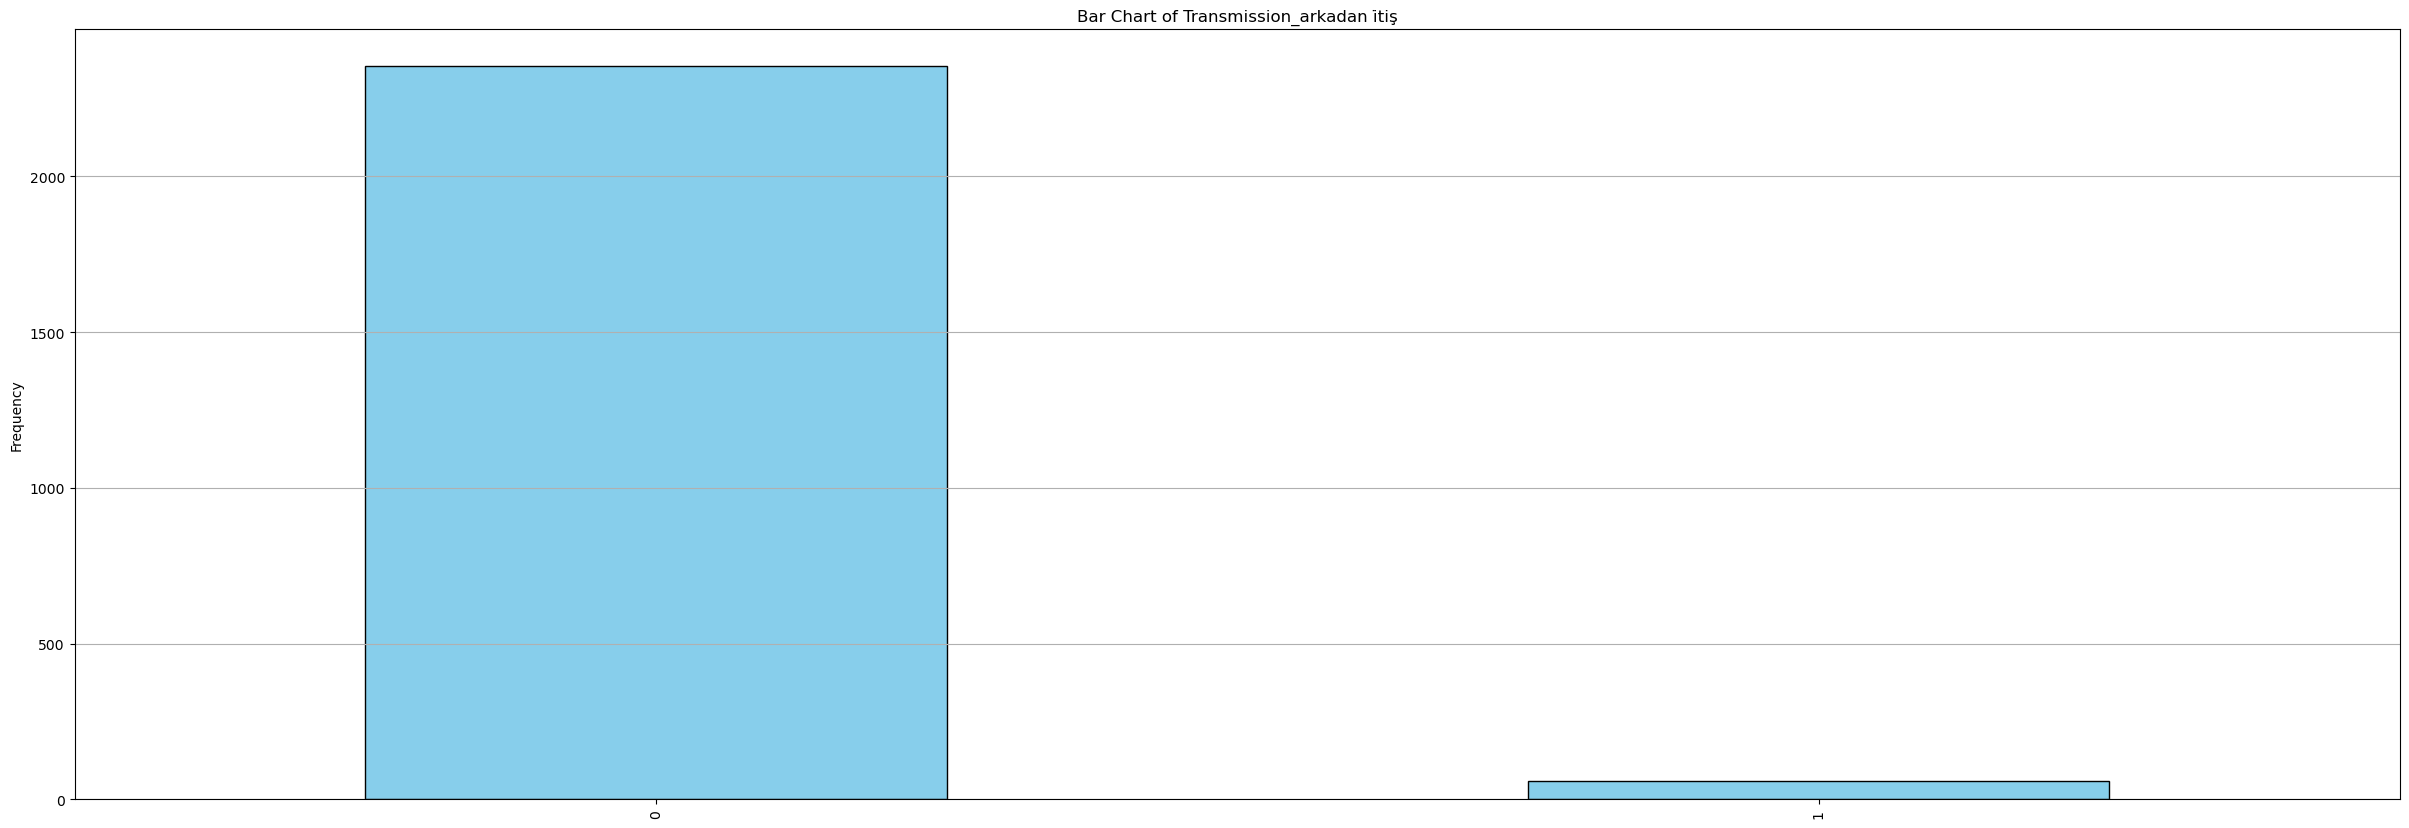

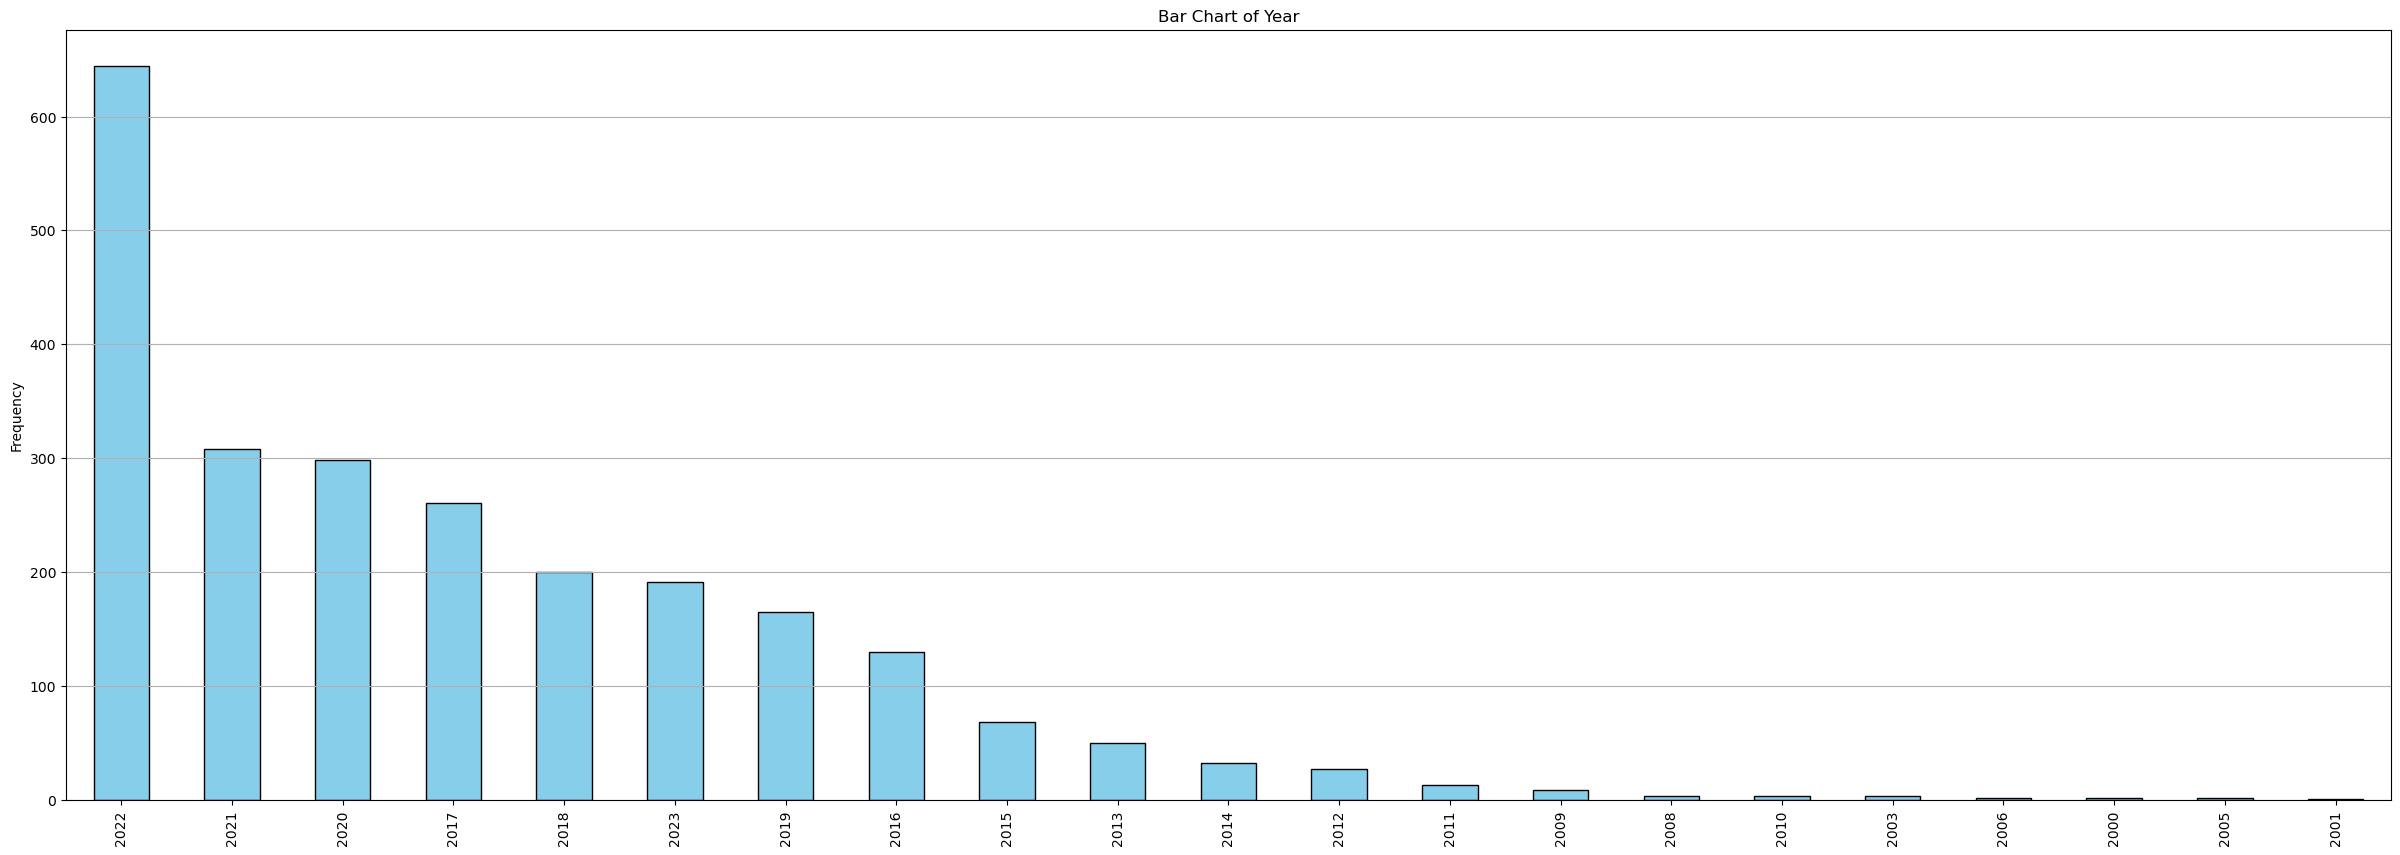

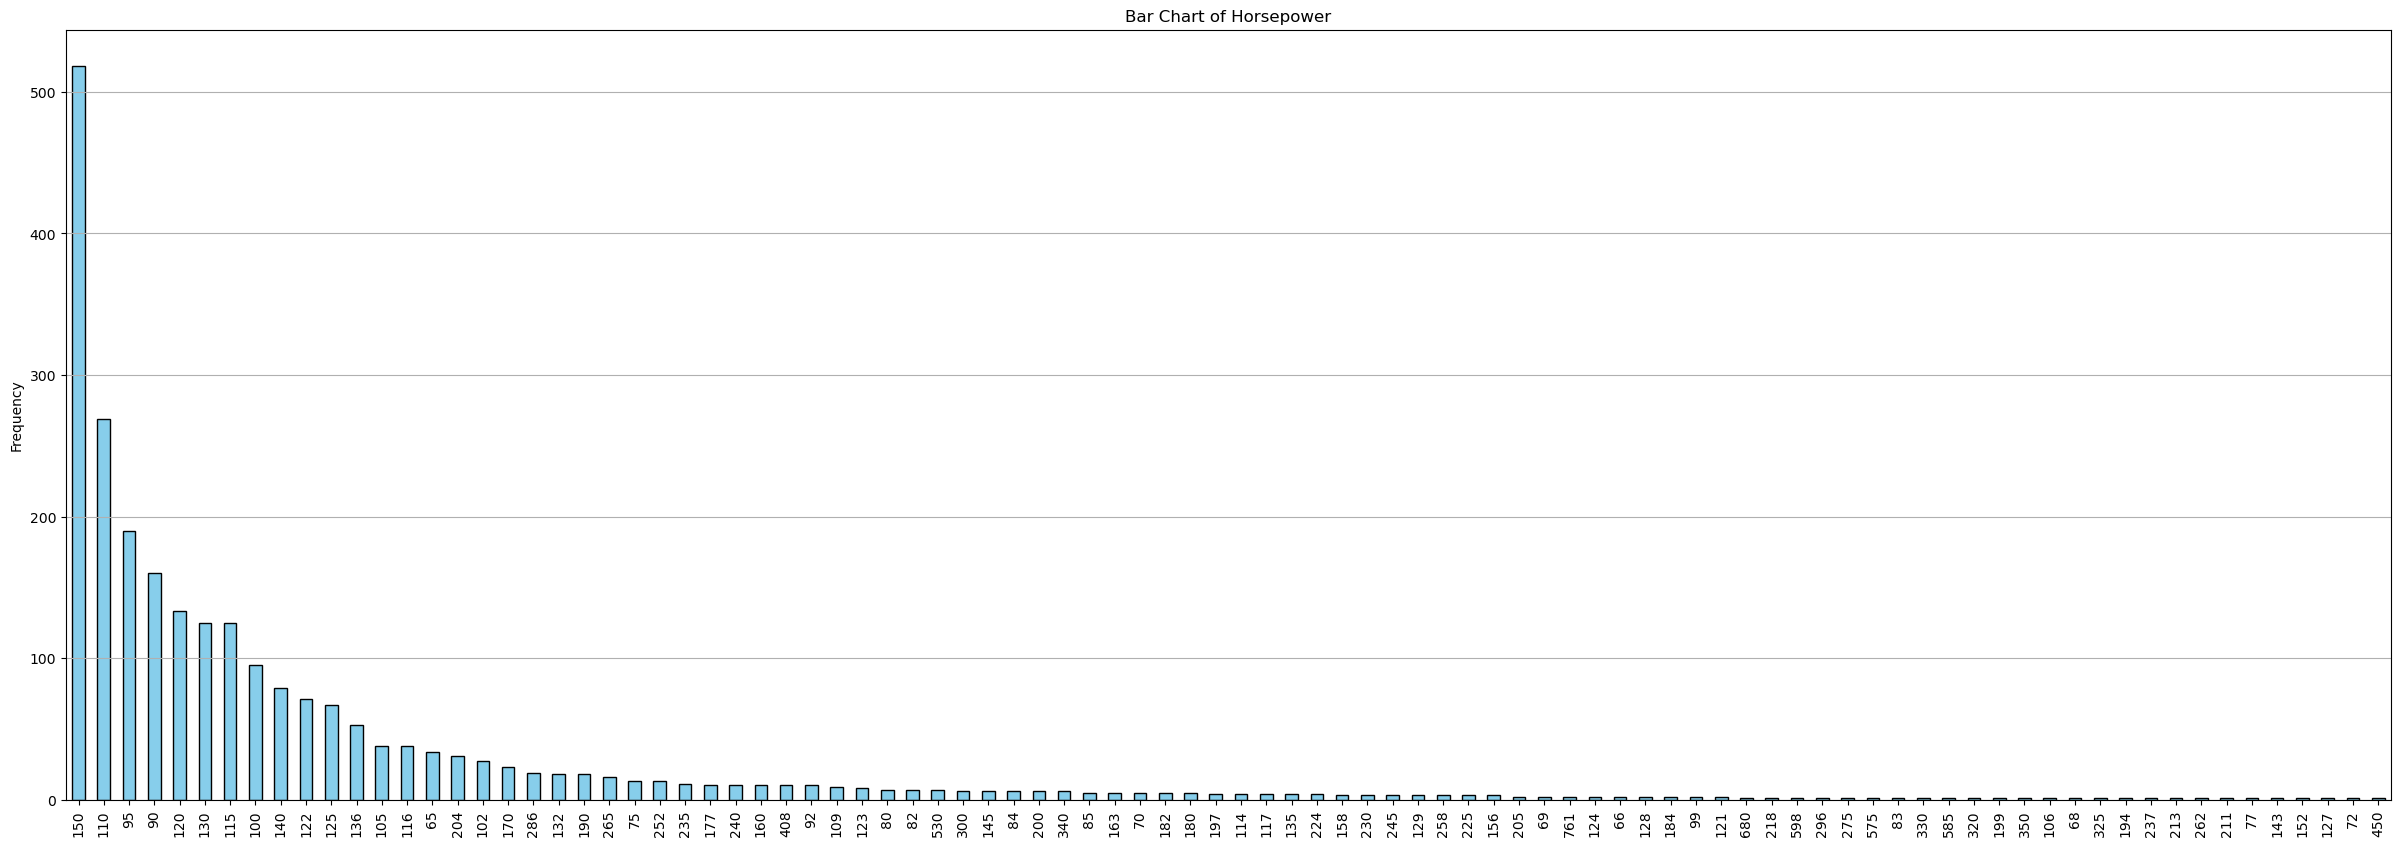

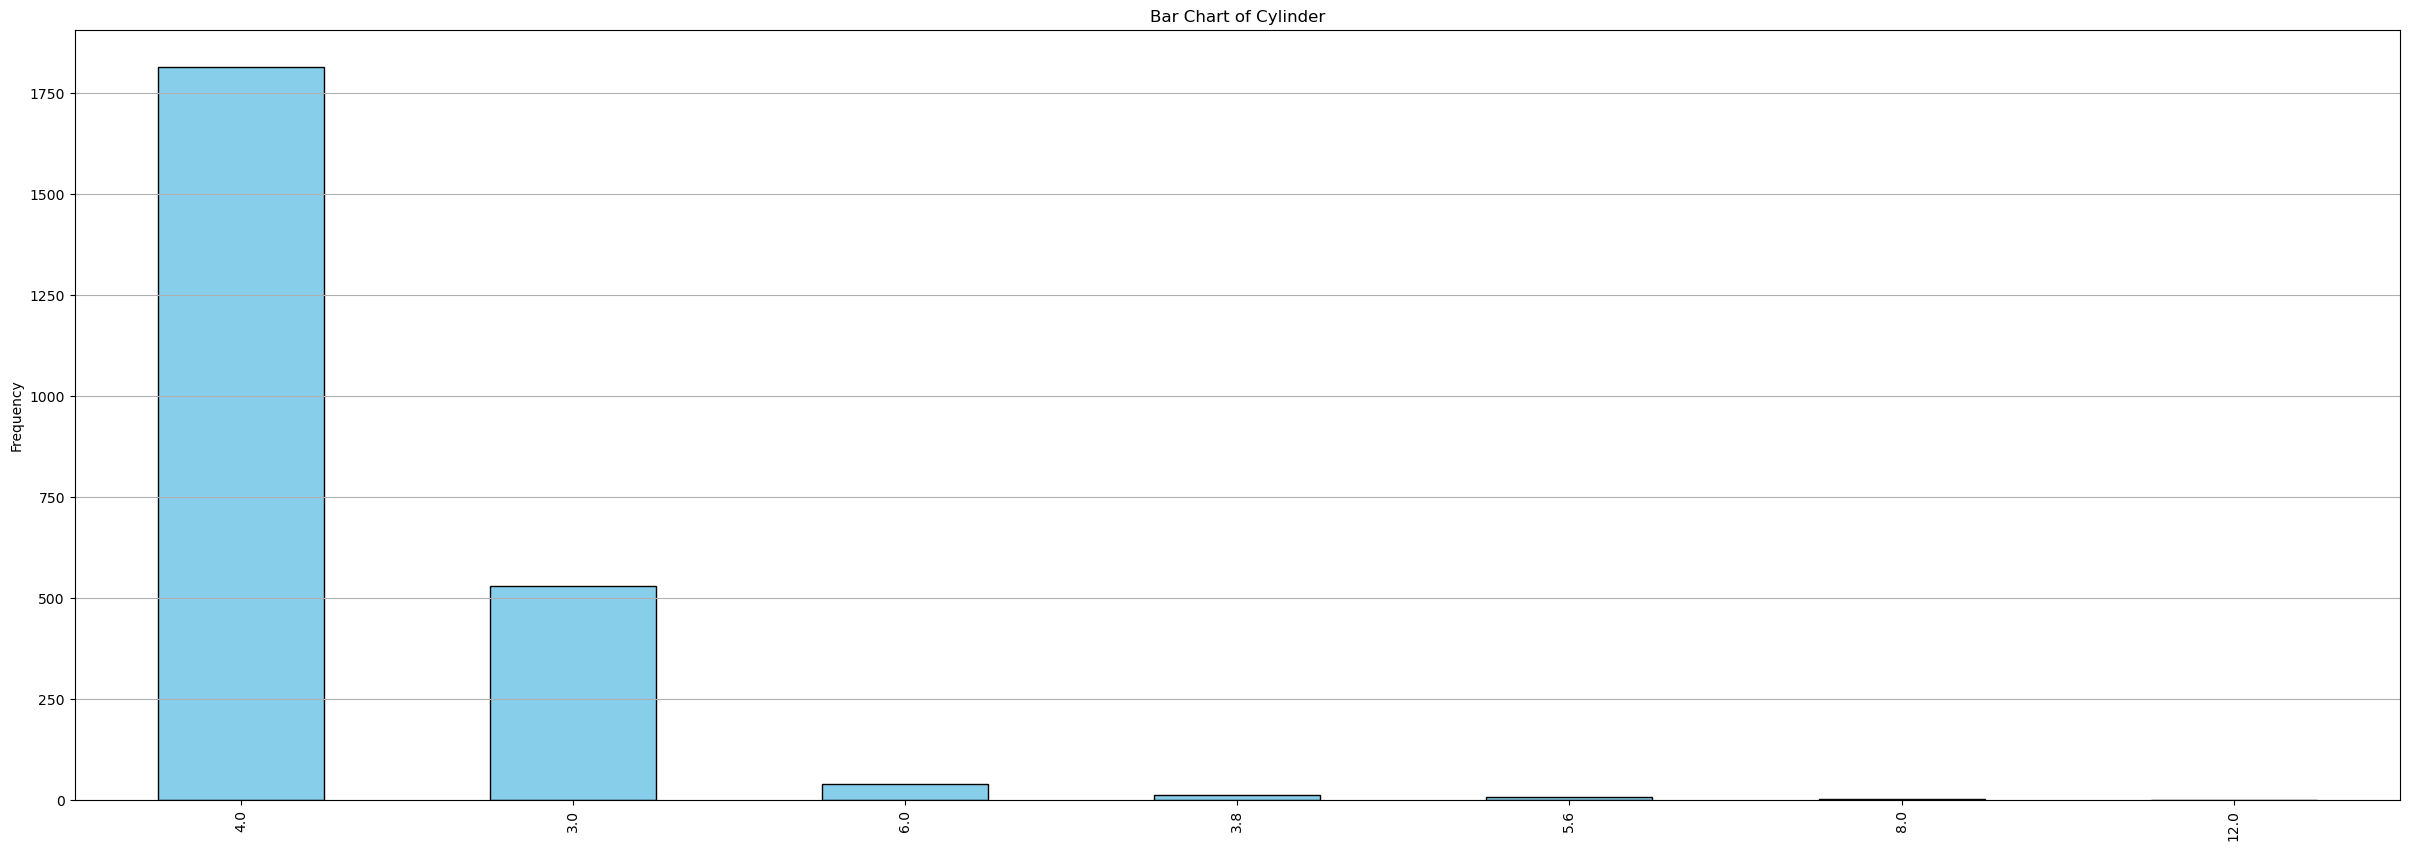

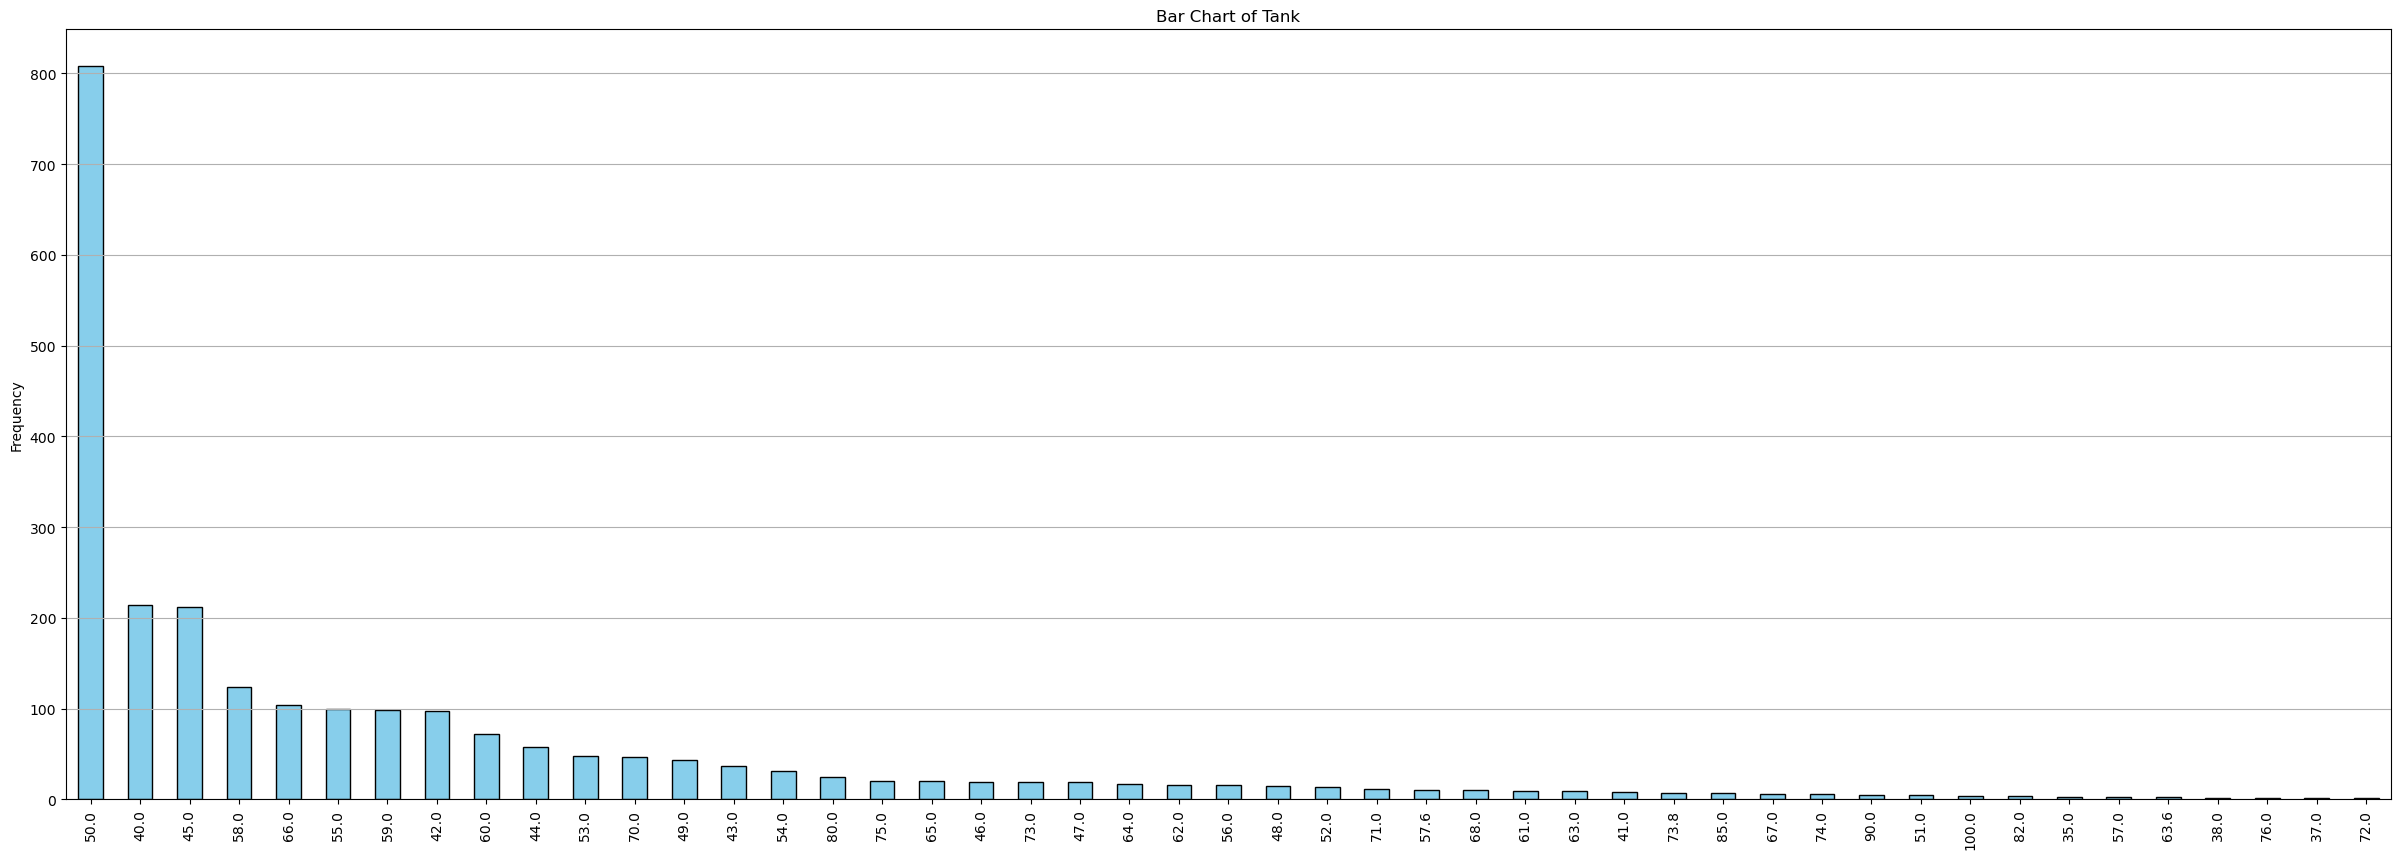

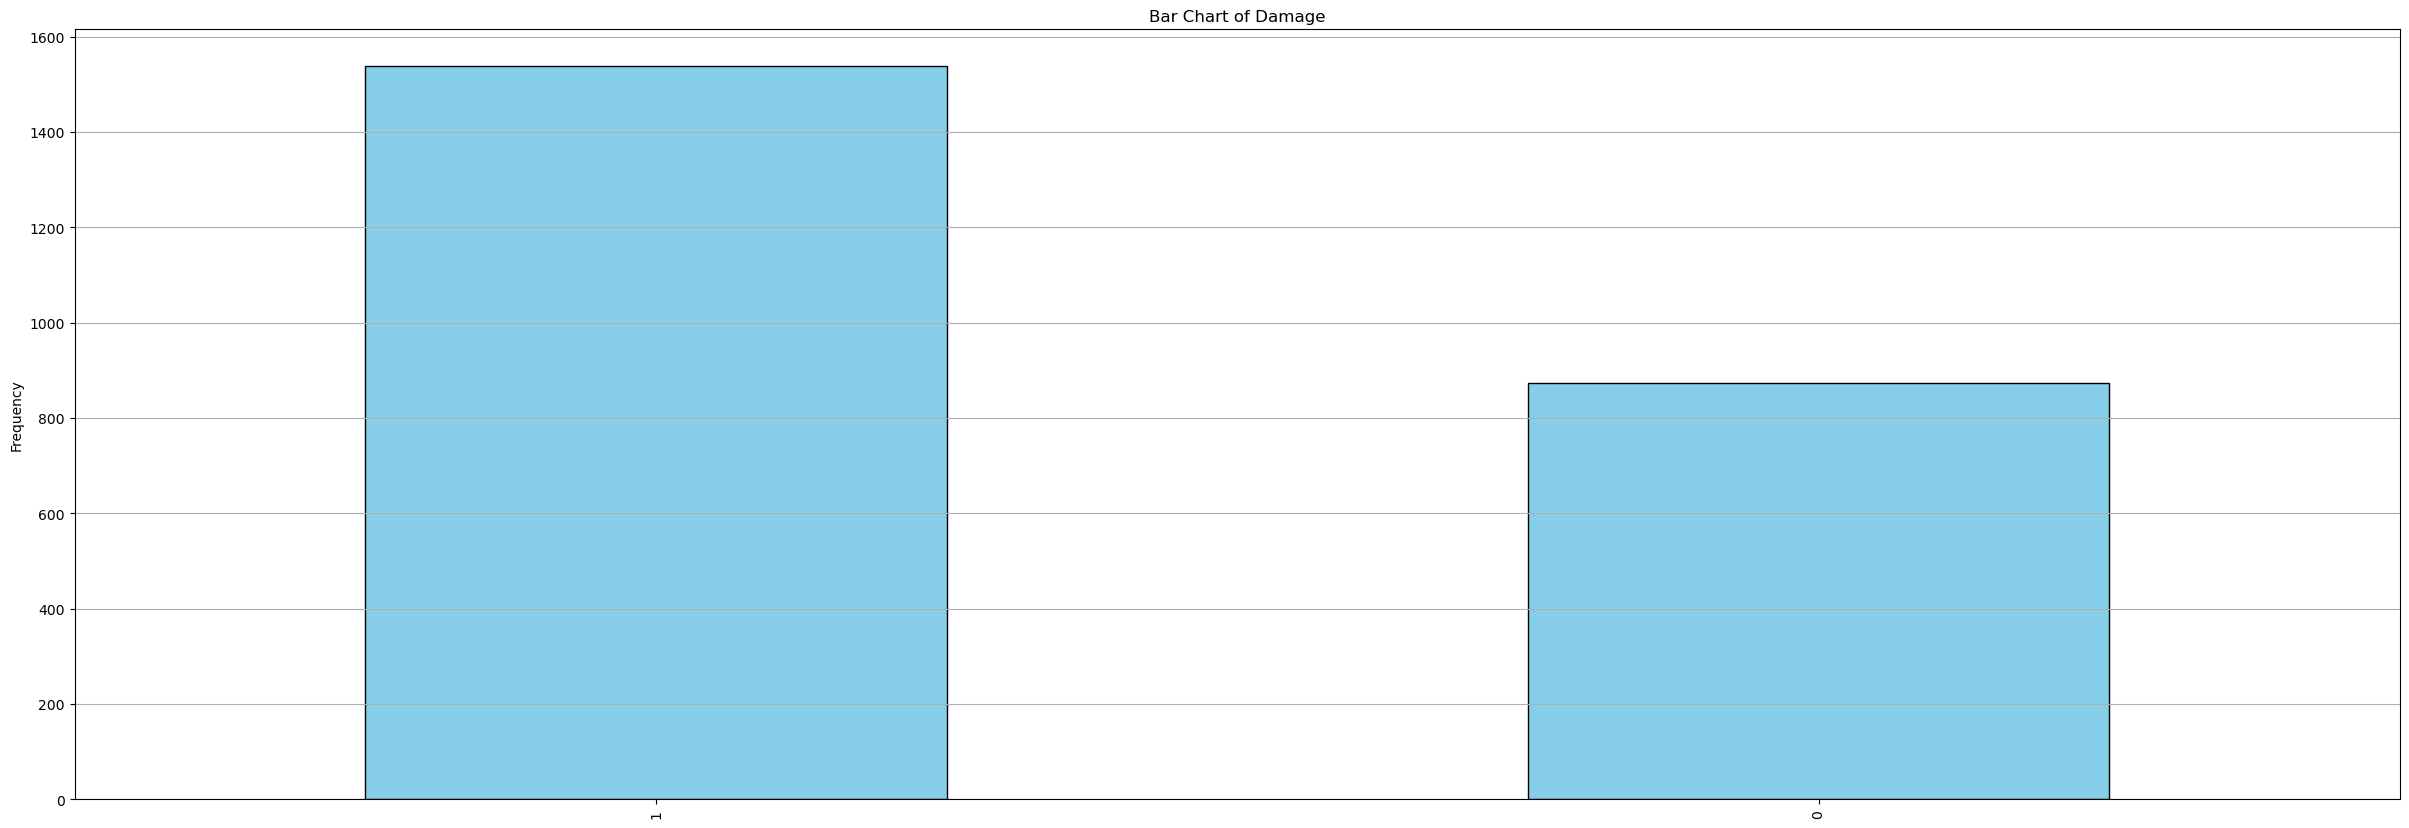

In [32]:
bar_char_columns = pandas.concat([dataset['Model'], dataset['Brand'],
                                 dataset['Gear_manuel'], dataset['Gear_multitronic'], dataset['Gear_otomatik'],
                                 dataset['Fuel_benzin'], dataset['Fuel_dizel'], dataset['Fuel_elektrik'],
                                 dataset['Engine Displacement'], dataset['Transmission_4x4'],
                                 dataset['Transmission_arkadan i̇tiş'], dataset['Year'], dataset['Horsepower'],
                                 dataset['Cylinder'], dataset['Tank'], dataset['Damage'],],axis=1)

for column in bar_char_columns.columns:
    plot.figure(figsize=(30,10))
    bar_char_columns[column].value_counts().plot(kind='bar',color='skyblue',edgecolor='black')
    plot.ylabel('Frequency')
    plot.title(f'Bar Chart of {column}')
    plot.grid(axis='y',alpha=1)
    plot.show()

    In these code blocks we trained our dataset with several algorithms (which are Simple Linear Regression, Ridge, Lasso, Elastic Net, Support Vector Regression (SVR), Decision Tree Regression and Random Forest Regression algorithms.). We calculated and compared their test, train and cross validation R^2 scores' and we took highest cross validation R^2 scores' mean model for.pkl file.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import joblib


dataset = dataset.fillna(dataset.mean())
#datasetStandardized = datasetStandardized.fillna(datasetStandardized.mean())

X = dataset.drop(columns=['Price'])
y = dataset['Price']

#X = datasetStandardized.drop(['Price'])
#y = datasetStandardized['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

models = {
    "Simple Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Support Vector Regression": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
}

best_model_name = None
best_score = -1

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    print(f"{name}: Cross-validated R^2 scores: {scores}")
    print(f"{name}: Average Cross-validated R^2 score: {np.mean(scores)}")
    print(f"{name}: Test R^2 score = {r2}")
    print(f"{name}: Train R^2 score = {r2_train}")
    print("--------------------------------------")
    
print(f"The best model is: {best_model_name}, Average cross-validation R^2 score: {best_score}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

y_pred_train_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_pred_train_best)
print(f"The best model is ({best_model_name}): Train R^2 score = {r2_train_best}")
joblib.dump(best_model, 'Best_Model.pkl')

Simple Linear Regression: Cross-validated R^2 scores: [0.46738429 0.73280419 0.76541854 0.7419475  0.63333956 0.82317796
 0.77389721 0.79286254 0.76047675 0.75679402]
Simple Linear Regression: Average Cross-validated R^2 score: 0.7248102551757343
Simple Linear Regression: Test R^2 score = 0.5852085135270593
Simple Linear Regression: Train R^2 score = 0.7593911065372414
--------------------------------------


/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.04563e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.15505e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.54797e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.73167e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/orhan/anaconda3/lib/python3.11/site-pa

Ridge: Cross-validated R^2 scores: [0.47212535 0.73217543 0.76570205 0.74431868 0.63412188 0.82195195
 0.77715411 0.79728917 0.759926   0.75635928]
Ridge: Average Cross-validated R^2 score: 0.726112389062016
Ridge: Test R^2 score = 0.5842616141991479
Ridge: Train R^2 score = 0.7592660172599645
--------------------------------------


/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.989e+14, tolerance: 2.546e+11
  model = cd_fast.enet_coordinate_descent(
/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.613e+14, tolerance: 2.168e+11
  model = cd_fast.enet_coordinate_descent(
/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Lasso: Cross-validated R^2 scores: [0.47091752 0.73233657 0.76349033 0.74770993 0.63155273 0.81652042
 0.7746898  0.78668193 0.76023983 0.75643428]
Lasso: Average Cross-validated R^2 score: 0.7240573334785803
Lasso: Test R^2 score = 0.5890998348207502
Lasso: Train R^2 score = 0.7586624105077738
--------------------------------------


/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+14, tolerance: 2.168e+11
  model = cd_fast.enet_coordinate_descent(
/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.364e+14, tolerance: 2.440e+11
  model = cd_fast.enet_coordinate_descent(
/home/orhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Elastic Net: Cross-validated R^2 scores: [0.52301377 0.7252249  0.74045395 0.73973167 0.60142511 0.78029975
 0.74236011 0.7653133  0.71689074 0.73597481]
Elastic Net: Average Cross-validated R^2 score: 0.7070688108743245
Elastic Net: Test R^2 score = 0.5513250261400229
Elastic Net: Train R^2 score = 0.7305185935382543
--------------------------------------
Support Vector Regression: Cross-validated R^2 scores: [-0.02252418 -0.04778019 -0.09285455 -0.06426749 -0.07119075 -0.09774359
 -0.07059753 -0.06876628 -0.09894149 -0.0911955 ]
Support Vector Regression: Average Cross-validated R^2 score: -0.0725861552788207
Support Vector Regression: Test R^2 score = -0.04223920442662066
Support Vector Regression: Train R^2 score = -0.06748753712430022
--------------------------------------
Decision Tree Regression: Cross-validated R^2 scores: [0.60286327 0.67965574 0.92541485 0.67253754 0.66463177 0.80048619
 0.83378474 0.79357426 0.83287663 0.77744418]
Decision Tree Regression: Average Cross-vali

['Best_Model.pkl']